# Automated Voigt Species Plots (VSP): CIV

This code is able to take the component groups and turn it into a csv file that contains all the information about the Veeper fits. It then reduces the pandas data frame to just the fits of the galaxy and runs them through a function that returns the voigt fit and the velocities associated with them to make voigt species plots similar to those seen in Figure 3 of Werk et al. 2013 (https://iopscience.iop.org/article/10.1088/0067-0049/204/2/17/pdf)

Note: This code is meant to be run after the veeper_create-run-collate.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 40

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 20,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 16,
          'xtick.minor.size': 13,
          'ytick.major.size': 16,
          'ytick.minor.size': 13}
plt.rcParams.update(params)

import glob
import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList

In [2]:
all_vp_df_J1101 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1101_rereduc/J1101_rereducall_vp.csv')
all_vp_df_J1159 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1159_rereduc/J1159_rereducall_vp.csv')
all_vp_df_J1220 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1220_rereduc/J1220_rereducall_vp.csv')
all_vp_df_J1222 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1222_rereduc/J1222_rereducall_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249_rereduc/J1249_rereducall_vp.csv')
all_vp_df_J1051 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1051_rereduc/J1051_rereducall_vp.csv')
all_vp_df_J1123 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1123_rereduc/J1123_rereducall_vp.csv')
all_vp_df_J0246 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J0246_rereduc/J0246_rereducall_vp.csv')
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235_rereduc/J1235_rereducall_vp.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#We care about the absorption features that we see around the galaxy so need to input the correct info for each one 
#Used some galaxy criterion to only see the lines that fit what I want to plot 

#Low mass galaxy, non detection
gal_df_J1101 = all_vp_df_J1101.loc[(all_vp_df_J1101['trans']=='C IV')] 
gal_df_J1101 

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
12,12,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1101...,1548.204,0.00002,14.075,0.031,51.700,4.817,9.630,3.32,2,2,2,-82.3867,82.3867,1547.815443,1548.666375,4465,4488,0.00006,C IV,a,--
13,13,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1101...,1550.781,0.00002,14.075,0.000,51.700,0.000,9.630,0.00,2,2,2,-82.3867,82.3867,1550.391797,1551.244145,4535,4558,0.00006,C IV,a,--
14,14,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1101...,1548.204,0.00046,13.563,0.076,21.264,6.169,4.694,3.93,3,3,3,-42.7721,42.7721,1548.696496,1549.138267,4489,4501,0.00048,C IV,a,--
15,15,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1101...,1550.781,0.00046,13.563,0.000,21.264,0.000,4.694,0.00,3,3,3,-42.7721,42.7721,1551.274315,1551.716822,4559,4571,0.00048,C IV,a,--
16,16,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1101...,1548.204,0.00229,13.436,0.104,22.952,8.902,-21.285,5.88,4,4,4,-33.6716,33.6716,1551.570916,1551.918693,4567,4577,0.00222,C IV,b,--
17,17,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1101...,1550.781,0.00229,13.436,0.000,22.952,0.000,-21.285,0.00,4,4,4,-33.6716,33.6716,1554.153520,1554.501876,4638,4647,0.00222,C IV,b,--


In [5]:
#high mass galaxy
gal_df_J1159 = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='C IV')] 
gal_df_J1159

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
35,35,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1548.204,-0.00014,14.284,0.05,54.417,6.849,-6.173,4.987,2,2,2,-101.3991,101.3991,1547.461975,1548.509276,4482,4511,-0.00016,C IV,a,--
36,36,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1550.781,-0.00014,14.284,0.00,54.417,0.000,-6.173,0.000,2,2,2,-101.3991,101.3991,1550.037740,1551.086785,4553,4581,-0.00016,C IV,a,--


In [6]:
gal_df_J1159_HI = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='H I') & (all_vp_df_J1159['zsys'] > 0.26) & (all_vp_df_J1159['zsys'] < 0.29)] 
gal_df_J1159_HI

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
4,4,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1215.67,0.27956,13.488,0.375,31.305,23.936,-9.360,19.925,2,2,2,-43.3272,43.3272,1555.342769,1555.694156,4697,4707,0.27952,H I,b,--
5,5,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1215.67,0.28000,14.079,0.233,60.061,45.276,-5.291,19.398,3,3,3,-52.6953,52.6953,1555.839639,1556.267002,4711,4722,0.27997,H I,b,--
6,6,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1215.67,0.28035,13.495,0.718,24.300,39.153,-2.173,17.779,4,4,4,-24.5911,24.5911,1556.379075,1556.578511,4726,4731,0.28034,H I,b,--
7,7,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1215.67,0.28059,13.345,0.358,14.899,21.336,-7.928,12.730,5,5,5,-24.5911,24.5911,1556.670812,1556.870248,4733,4739,0.28055,H I,b,--
8,8,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1215.67,0.28081,13.422,0.688,20.000,26.724,-1.668,17.515,6,6,6,-18.7361,18.7361,1556.968068,1557.120019,4742,4746,0.28080,H I,b,--
9,9,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159...,1215.67,0.28113,13.722,0.355,40.733,32.419,-21.046,31.158,7,7,7,-50.3533,50.3533,1557.222783,1557.631152,4749,4760,0.28104,H I,b,--


In [7]:
gal_df_J1220 = all_vp_df_J1220.loc[(all_vp_df_J1220['trans']=='C IV')] 
gal_df_J1220

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
3,3,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1220...,1548.204,-0.0001,14.026,0.044,69.741,8.925,-3.258,6.153,2,2,2,-121.6789,121.6789,1547.422703,1548.679464,4481,4516,-0.00011,C IV,a,--
4,4,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1220...,1550.781,-0.0001,14.026,0.000,69.741,0.000,-3.258,0.000,2,2,2,-121.6789,121.6789,1549.998403,1551.257256,4552,4586,-0.00011,C IV,a,--


In [8]:
gal_df_J1222 = all_vp_df_J1222.loc[(all_vp_df_J1222['trans']=='C IV')] 
gal_df_J1222

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
0,0,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1222...,1548.204,-0.00013,14.455,0.02,71.792,3.597,9.978,2.785,2,2,2,-158.436,158.436,1547.187069,1548.823476,4475,4520,-0.0001,C IV,a,--
1,1,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1222...,1550.781,-0.00013,14.455,0.00,71.792,0.000,9.978,0.000,2,2,2,-158.436,158.436,1549.762376,1551.401507,4545,4590,-0.0001,C IV,a,--


In [9]:
gal_df_J1249 = all_vp_df_J1249.loc[(all_vp_df_J1249['trans']=='C IV')]
gal_df_J1249

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
12,12,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249...,1548.204,-0.00011,14.065,0.032,39.361,3.796,1.752,2.582,2,2,2,-70.0734,70.0734,1547.667563,1548.391317,4488,4508,-0.00011,C IV,a,--
13,13,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249...,1550.781,-0.00011,14.065,0.000,39.361,0.000,1.752,0.000,2,2,2,-70.0734,70.0734,1550.243670,1550.968629,4558,4578,-0.00011,C IV,a,--
14,14,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249...,1548.204,0.00054,13.752,0.054,32.391,6.299,2.552,3.889,3,3,3,-57.3328,57.3328,1548.749228,1549.341391,4518,4534,0.00055,C IV,c,--
15,15,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249...,1550.781,0.00054,13.752,0.000,32.391,0.000,2.552,0.000,3,3,3,-57.3328,57.3328,1551.327136,1551.920284,4588,4604,0.00055,C IV,c,--
16,16,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249...,1548.204,0.00083,13.478,0.097,11.528,6.332,-11.743,3.109,4,4,4,-41.8620,41.8620,1549.266646,1549.699018,4532,4543,0.00079,C IV,c,--
17,17,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249...,1550.781,0.00083,13.478,0.000,11.528,0.000,-11.743,0.000,4,4,4,-41.8620,41.8620,1551.845415,1552.278506,4602,4614,0.00079,C IV,c,--
18,18,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249...,1548.204,0.00111,13.855,0.047,37.779,5.911,-19.061,3.881,5,5,5,-53.6926,53.6926,1549.652485,1550.207050,4542,4557,0.00105,C IV,b,--
19,19,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249...,1550.781,0.00111,13.855,0.000,37.779,0.000,-19.061,0.000,5,5,5,-53.6926,53.6926,1552.231896,1552.787384,4612,4628,0.00105,C IV,b,--


In [10]:
gal_df_J1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='C IV')] 
gal_df_J1051 

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
12,12,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1548.204,-0.00042,13.867,0.054,28.087,5.151,25.474,3.427,3,3,3,-54.8087,54.8087,1547.277753,1547.843845,4477,4493,-0.00033,C IV,b,--
13,13,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1550.781,-0.00042,13.867,0.000,28.087,0.000,25.474,0.000,3,3,3,-54.8087,54.8087,1549.853211,1550.420245,4548,4563,-0.00033,C IV,b,--
14,14,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1548.204,-0.00003,13.913,0.058,39.000,8.343,3.882,4.469,2,2,2,-38.4827,38.4827,1547.964285,1548.361753,4496,4507,-0.00001,C IV,b,--
15,15,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1550.781,-0.00003,13.913,0.000,39.000,0.000,3.882,0.000,2,2,2,-38.4827,38.4827,1550.540886,1550.939016,4566,4577,-0.00001,C IV,b,--
16,16,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1548.204,0.00026,13.289,0.165,27.700,16.315,14.993,10.071,4,4,4,-39.6488,39.6488,1548.397891,1548.807403,4508,4519,0.00031,C IV,c,--
17,17,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1550.781,0.00026,13.289,0.000,27.700,0.000,14.993,0.000,4,4,4,-39.6488,39.6488,1550.975213,1551.385408,4578,4589,0.00031,C IV,c,--
18,18,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1548.204,0.00443,13.880,0.053,35.261,6.057,7.423,4.006,2,2,2,-54.7802,54.7802,1554.786178,1555.351976,4682,4698,0.00446,C IV,a,--
19,19,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051...,1550.781,0.00443,13.880,0.000,35.261,0.000,7.423,0.000,2,2,2,-54.7802,54.7802,1557.374134,1557.940874,4753,4768,0.00446,C IV,a,--


In [11]:
gal_df_J1123 = all_vp_df_J1123.loc[(all_vp_df_J1123['trans']=='C IV')]
gal_df_J1123

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
4,4,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1123...,1548.204,0.00004,14.140,0.038,60.8,6.516,12.563,4.593,2,2,2,-91.9145,91.9145,1547.789757,1548.739096,4491,4517,0.00008,C IV,a,--
5,5,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1123...,1550.781,0.00004,14.140,0.000,60.8,0.000,12.563,0.000,2,2,2,-91.9145,91.9145,1550.366067,1551.316987,4562,4588,0.00008,C IV,a,--
6,6,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1123...,1548.204,0.00287,13.894,0.073,85.0,18.333,-20.329,12.309,2,2,2,-121.9459,121.9459,1552.014103,1553.273621,4607,4641,0.00280,C IV,b,--
7,7,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1123...,1550.781,0.00287,13.894,0.000,85.0,0.000,-20.329,0.000,2,2,2,-121.9459,121.9459,1554.597445,1555.859060,4677,4711,0.00280,C IV,b,--


In [12]:
gal_df_J0246 = all_vp_df_J0246.loc[(all_vp_df_J0246['trans']=='C IV')] 
gal_df_J0246

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
0,0,/Users/samgarza/Dropbox/COS-HolesHSTdata/J0246...,1548.204,0.00009,13.960,0.050,31.081,4.952,-11.230,3.307,2,2,2,-56.3752,56.3752,1548.045994,1548.628266,4498,4514,0.00005,C IV,a,--
1,1,/Users/samgarza/Dropbox/COS-HolesHSTdata/J0246...,1550.781,0.00009,13.960,0.000,31.081,0.000,-11.230,0.000,2,2,2,-56.3752,56.3752,1550.622731,1551.205972,4569,4585,0.00005,C IV,a,--
3,3,/Users/samgarza/Dropbox/COS-HolesHSTdata/J0246...,1548.204,0.00426,14.143,0.046,55.600,7.584,3.986,5.183,2,2,2,-92.5266,92.5266,1554.314474,1555.270135,4669,4695,0.00427,C IV,b,--
4,4,/Users/samgarza/Dropbox/COS-HolesHSTdata/J0246...,1550.781,0.00426,14.143,0.000,55.600,0.000,3.986,0.000,2,2,2,-92.5266,92.5266,1556.901645,1557.858897,4740,4766,0.00427,C IV,b,--
5,5,/Users/samgarza/Dropbox/COS-HolesHSTdata/J0246...,1548.204,0.00471,13.709,0.104,15.365,6.090,-4.481,3.752,3,3,3,-54.5020,54.5020,1555.220772,1555.783696,4694,4709,0.00470,C IV,b,--
6,6,/Users/samgarza/Dropbox/COS-HolesHSTdata/J0246...,1550.781,0.00471,13.709,0.000,15.365,0.000,-4.481,0.000,3,3,3,-54.5020,54.5020,1557.809451,1558.373312,4764,4780,0.00470,C IV,b,--


In [13]:
gal_df_J1235 = all_vp_df_J1235.loc[(all_vp_df_J1235['trans']=='C IV')] 
gal_df_J1235

,Unnamed: 0,specfile,restwave,zsys,col,sigcol,bval,sigbval,vel,sigvel,nflag,bflag,vflag,vlim1,vlim2,wobs1,wobs2,pix1,pix2,z_comp,trans,rely,comment
0,0,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1235...,1548.204,0.00007,14.425,0.038,59.502,5.395,-10.91,4.207,2,2,2,-128.0163,128.0163,1547.658357,1548.980574,4488,4524,0.00004,C IV,b,--
1,1,/Users/samgarza/Dropbox/COS-HolesHSTdata/J1235...,1550.781,0.00007,14.425,0.000,59.502,0.000,-10.91,0.000,2,2,2,-128.0163,128.0163,1550.234448,1551.558866,4558,4594,0.00004,C IV,b,--


In [14]:
#Pull the parts from gal_df that I want/need for the fitting and plots 

#J1101 Values 
trans_J1101 = np.array(gal_df_J1101['trans'])
zsys_J1101 = np.array(gal_df_J1101['zsys'])
N_J1101 = np.array(gal_df_J1101['col'])
b_J1101 = np.array(gal_df_J1101['bval'])
vel_J1101 = np.array(gal_df_J1101['vel'])
wav_J1101 = np.array(gal_df_J1101['restwave'])

#J1159 Values 
trans_J1159 = np.array(gal_df_J1159['trans'])
zsys_J1159 = np.array(gal_df_J1159['zsys'])
N_J1159 = np.array(gal_df_J1159['col'])
b_J1159 = np.array(gal_df_J1159['bval'])
vel_J1159 = np.array(gal_df_J1159['vel'])
wav_J1159 = np.array(gal_df_J1159['restwave'])

#J1159 Values 
trans_J1159_HI = np.array(gal_df_J1159_HI['trans'])
zsys_J1159_HI = np.array(gal_df_J1159_HI['zsys'])
N_J1159_HI = np.array(gal_df_J1159_HI['col'])
b_J1159_HI = np.array(gal_df_J1159_HI['bval'])
vel_J1159_HI = np.array(gal_df_J1159_HI['vel'])
wav_J1159_HI = np.array(gal_df_J1159_HI['restwave'])

#J1220 Values 
trans_J1220 = np.array(gal_df_J1220['trans'])
zsys_J1220 = np.array(gal_df_J1220['zsys'])
N_J1220 = np.array(gal_df_J1220['col'])
b_J1220 = np.array(gal_df_J1220['bval'])
vel_J1220 = np.array(gal_df_J1220['vel'])
wav_J1220 = np.array(gal_df_J1220['restwave'])

#J1222 Values 
trans_J1222 = np.array(gal_df_J1222['trans'])
zsys_J1222 = np.array(gal_df_J1222['zsys'])
N_J1222 = np.array(gal_df_J1222['col'])
b_J1222 = np.array(gal_df_J1222['bval'])
vel_J1222 = np.array(gal_df_J1222['vel'])
wav_J1222 = np.array(gal_df_J1222['restwave'])

#J1249 Values 
trans_J1249 = np.array(gal_df_J1249['trans'])
zsys_J1249 = np.array(gal_df_J1249['zsys'])
N_J1249 = np.array(gal_df_J1249['col'])
b_J1249 = np.array(gal_df_J1249['bval'])
vel_J1249 = np.array(gal_df_J1249['vel'])
wav_J1249 = np.array(gal_df_J1249['restwave'])

#J1051 Values 
trans_J1051 = np.array(gal_df_J1051['trans'])
zsys_J1051 = np.array(gal_df_J1051['zsys'])
N_J1051 = np.array(gal_df_J1051['col'])
b_J1051 = np.array(gal_df_J1051['bval'])
vel_J1051 = np.array(gal_df_J1051['vel'])
wav_J1051 = np.array(gal_df_J1051['restwave'])

#J1123 Values 
trans_J1123 = np.array(gal_df_J1123['trans'])
zsys_J1123 = np.array(gal_df_J1123['zsys'])
N_J1123 = np.array(gal_df_J1123['col'])
b_J1123 = np.array(gal_df_J1123['bval'])
vel_J1123 = np.array(gal_df_J1123['vel'])
wav_J1123 = np.array(gal_df_J1123['restwave'])

#J0246 Values 
trans_J0246= np.array(gal_df_J0246['trans'])
zsys_J0246 = np.array(gal_df_J0246['zsys'])
N_J0246 = np.array(gal_df_J0246['col'])
b_J0246 = np.array(gal_df_J0246['bval'])
vel_J0246 = np.array(gal_df_J0246['vel'])
wav_J0246 = np.array(gal_df_J0246['restwave'])

#J1235 Values 
trans_J1235= np.array(gal_df_J1235['trans'])
zsys_J1235 = np.array(gal_df_J1235['zsys'])
N_J1235 = np.array(gal_df_J1235['col'])
b_J1235 = np.array(gal_df_J1235['bval'])
vel_J1235 = np.array(gal_df_J1235['vel'])
wav_J1235 = np.array(gal_df_J1235['restwave'])

In [15]:
# Define constants

from astropy import constants as const
c = const.c.to('km/s').value #speed of light in km/s for velocity => redshift conversions 

# Load spectrum for plotting
ism = LineList('ISM')

#J1101
specfile_J1101 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1101+1429/J1101+1429_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1101 = lsio.readspec(specfile_J1101)

#J1159
specfile_J1159 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159+5106/J1159+5106_nbin3_method1_jwnormaugust2023.fits' #normalized spectra file 
xspec_J1159 = lsio.readspec(specfile_J1159)

#J1220
specfile_J1220 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1220+4643/J1220+4643_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1220 = lsio.readspec(specfile_J1220)

#J1222
specfile_J1222 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1222+4612/J1222+4612_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1222 = lsio.readspec(specfile_J1222)

#J1249
specfile_J1249 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249+4122/J1249+4122_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1249 = lsio.readspec(specfile_J1249)

#J1051
specfile_J1051 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1051+2805/J1051+2805_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1051 = lsio.readspec(specfile_J1051)

#J1123
specfile_J1123 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1123+1257/J1123+1257_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1123 = lsio.readspec(specfile_J1123)

#J0246
specfile_J0246 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J0246-3007/J0246-3007_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J0246 = lsio.readspec(specfile_J0246)

#J1235
specfile_J1235 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1235+1123/J1235+1123_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1235 = lsio.readspec(specfile_J1235)

read_sets: Using set file -- 
  /Users/samgarza/linetools/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [16]:
#Converts wavelengths to velocities 
def convert_wave2vel(obs_wave, rest_wave, LSR_vel=0.):
    # Define constants
    c = const.c.to('km/s').value #has the right value but no units 
    return (((obs_wave - rest_wave)/rest_wave) * c) - LSR_vel #calculates z then * c to makes velocity

#Function to make the bulk of the species plots 
def voigt_species(xspec, redshift, column_density, b_value, restwavelen, LSR): 
    # Set line attributes 
    N = 10**(column_density)/u.km**2  # Column density => Not sure on the units of this 
    b = b_value*u.km/u.s      # Doppler b parameter => Not sure on the units of this => 
    z = redshift            # redshift of absorption feature
    restwav = restwavelen*u.Angstrom

    absline = AbsLine(restwav)  # Initialize AbsLine object
    absline.attrib['N'] = N
    absline.attrib['b'] = b
    absline.setz(z)
    
    # Generate model voigt profiles

    wv_array = xspec.wavelength # Use wavelength array from the spectrum you loaded

    voigt = absline.generate_voigt(wave=wv_array)
    
    vels = convert_wave2vel(wv_array, restwav, LSR_vel=LSR) #This LSR_vel changes for each galaxy/QSO LOS 
    
    return voigt, vels

In [17]:
#This is the actually automated part and this makes life so much easier 

#This is the order: NGC 3489, NGC 4026, NGC 4736, NGC 3414, NGC 3627, NGC 1097, NGC 4564, NGC 4258 (J1222), NGC 4258 (J1220)
LSR_values = np.array([676.9, 985.1, 307.8, 1469.8, 721, 1271.1, 1141.9, 461.08])

#J1101
Voigt_J1101 = []
Vels_J1101 = []

for i in range(len(trans_J1101)): 
    vo, ve = voigt_species(xspec_J1101, zsys_J1101[i], N_J1101[i], b_J1101[i], wav_J1101[i], LSR_values[0])
    
    Voigt_J1101.append(vo)
    Vels_J1101.append(ve)
    
#J1159
Voigt_J1159 = []
Vels_J1159 = []

for i in range(len(trans_J1159)): 
    vo, ve = voigt_species(xspec_J1159, zsys_J1159[i], N_J1159[i], b_J1159[i], wav_J1159[i], LSR_values[1])
   
    Voigt_J1159.append(vo)
    Vels_J1159.append(ve)
    
#J1159 for HI 
Voigt_J1159_HI = []
Vels_J1159_HI = []

for i in range(len(trans_J1159_HI)): 
    vo, ve = voigt_species(xspec_J1159, zsys_J1159_HI[i], N_J1159_HI[i], b_J1159_HI[i], wav_J1159_HI[i], LSR_values[1])
    #VO, VE = voigt_species(smooth_xspec_J1159, zsys_J1159[i], N_J1159[i], b_J1159[i], wav_J1159[i], LSR_values[1])
   
    Voigt_J1159_HI.append(vo)
    Vels_J1159_HI.append(ve)
    
#J1220
Voigt_J1220 = []
Vels_J1220 = []

for i in range(len(trans_J1220)): 
    vo, ve = voigt_species(xspec_J1220, zsys_J1220[i], N_J1220[i], b_J1220[i], wav_J1220[i], LSR_values[7])
   
    Voigt_J1220.append(vo)
    Vels_J1220.append(ve)
    
#J1222
Voigt_J1222 = []
Vels_J1222 = []

for i in range(len(trans_J1222)): 
    vo, ve = voigt_species(xspec_J1222, zsys_J1222[i], N_J1222[i], b_J1222[i], wav_J1222[i], LSR_values[7])
   
    Voigt_J1222.append(vo)
    Vels_J1222.append(ve)
    
#J1249
Voigt_J1249 = []
Vels_J1249 = []

for i in range(len(trans_J1249)): 
    vo, ve = voigt_species(xspec_J1249, zsys_J1249[i], N_J1249[i], b_J1249[i], wav_J1249[i], LSR_values[2])
   
    Voigt_J1249.append(vo)
    Vels_J1249.append(ve)

#J051
Voigt_J1051 = []
Vels_J1051 = []

for i in range(len(trans_J1051)): 
    vo, ve = voigt_species(xspec_J1051, zsys_J1051[i], N_J1051[i], b_J1051[i], wav_J1051[i], LSR_values[3])
    
    Voigt_J1051.append(vo)
    Vels_J1051.append(ve)
    
#J1123
Voigt_J1123 = []
Vels_J1123 = []

for i in range(len(trans_J1123)): 
    vo, ve = voigt_species(xspec_J1123, zsys_J1123[i], N_J1123[i], b_J1123[i], wav_J1123[i], LSR_values[4])
    
    Voigt_J1123.append(vo)
    Vels_J1123.append(ve)
    
#J0246
Voigt_J0246 = []
Vels_J0246 = []

for i in range(len(trans_J0246)): 
    vo, ve = voigt_species(xspec_J0246, zsys_J0246[i], N_J0246[i], b_J0246[i], wav_J0246[i], LSR_values[5])
    
    Voigt_J0246.append(vo)
    Vels_J0246.append(ve)
    
#J1235
Voigt_J1235 = []
Vels_J1235 = []

for i in range(len(trans_J1235)): 
    vo, ve = voigt_species(xspec_J1235, zsys_J1235[i], N_J1235[i], b_J1235[i], wav_J1235[i], LSR_values[6])
    
    Voigt_J1235.append(vo)
    Vels_J1235.append(ve)

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


/Users/samgarza/linetools/linetools/analysis/voigt.py:187: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/Users/samgarza/linetools/linetools/analysis/voigt.py:188: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')
/Users/samgarza/linetools/linetools/analysis/voigt.py:244: UserWarning: Assuming infinite spectral resolution, i.e. no smoothing.
  warnings.warn('Assuming infinite spectral resolution, i.e. no smoothing.')
/Users/samgarza/linetools/linetools/analysis/voigt.py:245: UserWarning: Set fwhm to smooth.
  warnings.warn('Set fwhm to smooth.')


Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on 

In [18]:
#labels for each feature

#J1101
labels_J1101 = []
for i in range(len(trans_J1101)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1101.append((trans_J1101[i], wav_J1101[i], zsys_J1101[i], N_J1101[i], b_J1101[i]))

#J1159
labels_J1159 = []
for i in range(len(trans_J1159)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1159.append((trans_J1159[i], wav_J1159[i], zsys_J1159[i], N_J1159[i], b_J1159[i]))
    
#J1159 for HI
labels_J1159_HI = []
for i in range(len(trans_J1159_HI)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1159_HI.append((trans_J1159_HI[i], wav_J1159_HI[i], zsys_J1159_HI[i], N_J1159_HI[i], b_J1159_HI[i]))

#J1220
labels_J1220 = []
for i in range(len(trans_J1220)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1220.append((trans_J1220[i], wav_J1220[i], zsys_J1220[i], N_J1220[i], b_J1220[i]))

    
#J1222
labels_J1222 = []
for i in range(len(trans_J1222)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1222.append((trans_J1222[i], wav_J1222[i], zsys_J1222[i], N_J1222[i], b_J1222[i]))

#J1249
labels_J1249 = []
for i in range(len(trans_J1249)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1249.append((trans_J1249[i], wav_J1249[i], zsys_J1249[i], N_J1249[i], b_J1249[i]))

#J1051
labels_J1051 = []
for i in range(len(trans_J1051)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1051.append((trans_J1051[i], wav_J1051[i], zsys_J1051[i], N_J1051[i], b_J1051[i]))

#J1123
labels_J1123 = []
for i in range(len(trans_J1123)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1123.append((trans_J1123[i], wav_J1123[i], zsys_J1123[i], N_J1123[i], b_J1123[i]))
    
#J0246
labels_J0246 = []
for i in range(len(trans_J0246)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J0246.append((trans_J0246[i], wav_J0246[i], zsys_J0246[i], N_J0246[i], b_J0246[i]))
    
#J1235
labels_J1235 = []
for i in range(len(trans_J1235)): 
    #Transition, wavelength, redshift, column density, impact parameter
    labels_J1235.append((trans_J1235[i], wav_J1235[i], zsys_J1235[i], N_J1235[i], b_J1235[i]))

In [19]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

from mycolorpy import colorlist as mcp
#For the MBH 
color1=mcp.gen_color(cmap="winter",n=5)
print(color1)

['#0000ff', '#0040df', '#0080bf', '#00c09f', '#00ff80']


In [20]:
#VSP for each galaxy 

#J1101
def J1101_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548 
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[0].axvspan(-800, -450, alpha = 0.35, color = 'lightgrey')
    #axs[0].plot(Vels[0]+vel_J1101[0], Voigt[0].flux, c=CB_color_cycle[6], lw=5)  
    #axs[0].plot(Vels[2]+vel_J1101[2], Voigt[2].flux, c=CB_color_cycle[6], lw=5) 
    axs[0].plot(Vels[4]+vel_J1101[4], Voigt[4].flux, c= '#0000ff', lw=5, label = labels_J1101[4] )
    axs[0].plot(Vels[0], xspec_J1101.sig/xspec_J1101.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-500,500)
    axs[0].set_ylim(0,1.2)
    #axs[0].set_title('Galaxy (NGC 3489): z = 0.002258, b = 110.0, log$_{10}$$M_{*}$=10.2$M_{\odot}$, log$_{10}$$M_{BH}$ = 6.77$M_{\odot}$; QSO: J1101+1429, z = 0.6359', fontsize=16.5)
    axs[0].set_title(r"$\bf{NGC \, 3489}$" + ': z = 0.002258, b = 110.0, log$_{10}$$M_{*}$=10.2$M_{\odot}$, log$_{10}$$M_{BH}$ = 6.77$M_{\odot}$; ' + r"$\bf{QSO: \, J1101}$" + ', z = 0.6359',  fontsize=22)
    axs[0].annotate('$\chi^{2}$ = 0.95', (-490, 0.05), fontsize=25) #fontweight="bold"
    axs[0].legend(loc=4, fontsize=25)

    #CIV 1550 
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[1].axvspan(-800, -450, alpha = 0.35, color = 'lightgrey')
    #axs[1].plot(Vels[1]+vel_J1101[1], Voigt[1].flux, c=CB_color_cycle[6], lw=5) 
    #axs[1].plot(Vels[3]+vel_J1101[3], Voigt[3].flux, c=CB_color_cycle[6], lw=5) 
    axs[1].plot(Vels[5]+vel_J1101[5], Voigt[5].flux, c='#0000ff', lw=5, label = labels_J1101[5] )
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-500,500)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4, fontsize=25)
    axs[1].annotate('$\chi^{2}$ = 0.95', (-490, 0.05), fontsize=25)
    axs[1].set_xlabel('$v_{rel}$ [km/s]', fontsize=45)
    
    fig.text(0.06, 0.5, 'Continuum Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=45)

#################################################################


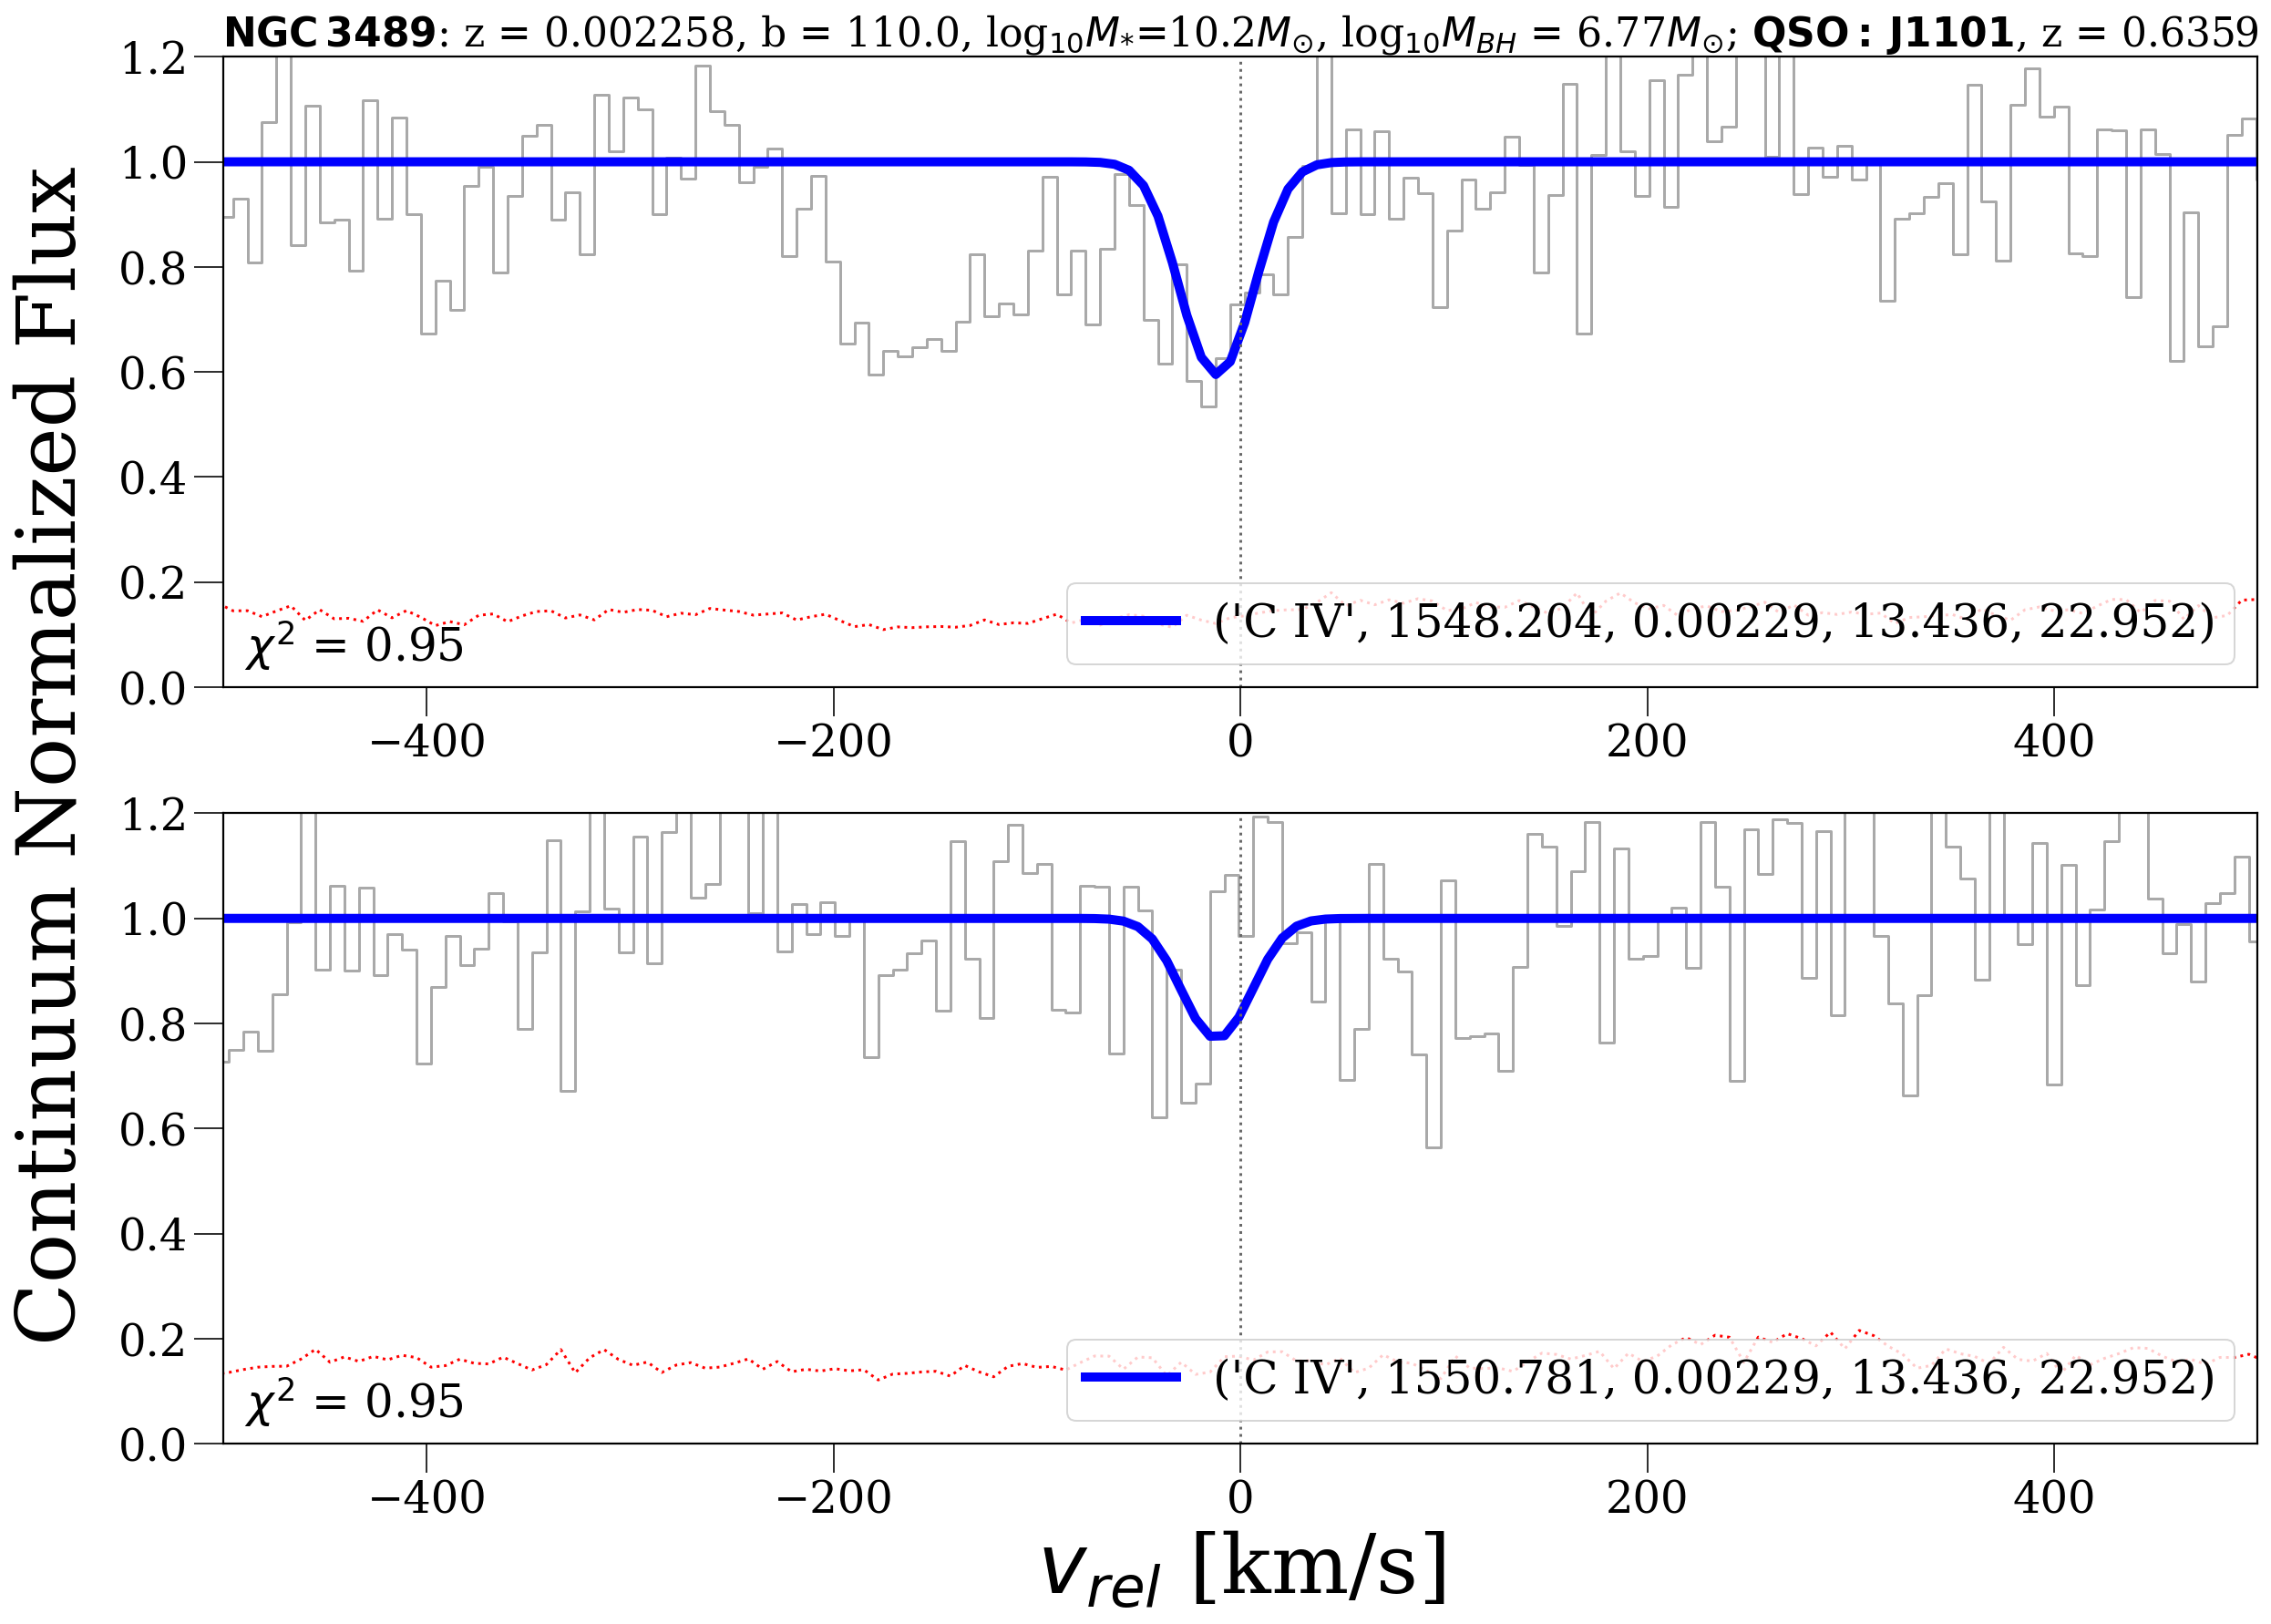

In [45]:
# J1101 - Unsmoothed spectra 
J1101_vsp(xspec_J1101, Vels_J1101, Voigt_J1101)
#plt.tight_layout()
plt.savefig('Figures_noMW/J1101_vsp2.png', pad_inches=0.05)

In [21]:
#################################################################
    
#J1159
def J1159_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-50, 50, alpha = 0.35, color = 'lightgrey', label = r'log$N_{CIV}$ = <13.24') 
    #axs[0].plot(Vels[0]+vel_J1159[0], Voigt[0].flux, c=CB_color_cycle[6], label = labels_J1159[0], lw=5) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-500,500)
    axs[0].set_ylim(0,1.2)
    #axs[0].set_title('Galaxy (NGC 4026): z = 0.003286, b = 37.38, log$_{10}$$M_{*}$ = 10.43$M_{\odot}$, log$_{10}$$M_{BH}$ = 8.25$M_{\odot}$; QSO: J1159+5106, z = 0.524',fontsize=16.5)
    axs[0].set_title(r"$\bf{NGC \, 4026}$" + ': z = 0.003286, b = 37.38, log$_{10}$$M_{*}$ = 10.43$M_{\odot}$, log$_{10}$$M_{BH}$ = 8.25$M_{\odot}$ ; ' + r"$\bf{QSO: \, J1159}$" + ', z = 0.524',  fontsize=21)
    #axs[0].annotate('$\chi^{2}$ = 1.56', (-1390, 0.05), fontsize=25)
    axs[0].legend(loc=4, fontsize=25)

    #CIV 1550
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[1].axvspan(-50, 50, alpha = 0.35, color = 'lightgrey', label=r'log$N_{CIV}$ = <13.6')
    #axs[1].plot(Vels[1]+vel_J1159[1], Voigt[1].flux, c=CB_color_cycle[6],label= labels_J1159[1], lw=5) 
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-500,500)
    axs[1].set_ylim(0,1.2)
    #axs[1].legend(loc=4, fontsize=25)
    #axs[1].annotate('$\chi^{2}$ = 1.56', (-1390, 0.05), fontsize=25)
    axs[1].annotate('HI 1215 Contamination', (5, 0.79), fontsize=20)
    axs[1].set_xlabel('$v_{rel}$ [km/s]', fontsize=45)
    
    fig.text(0.06, 0.5, 'Continuum Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=45)
    
#################################################################

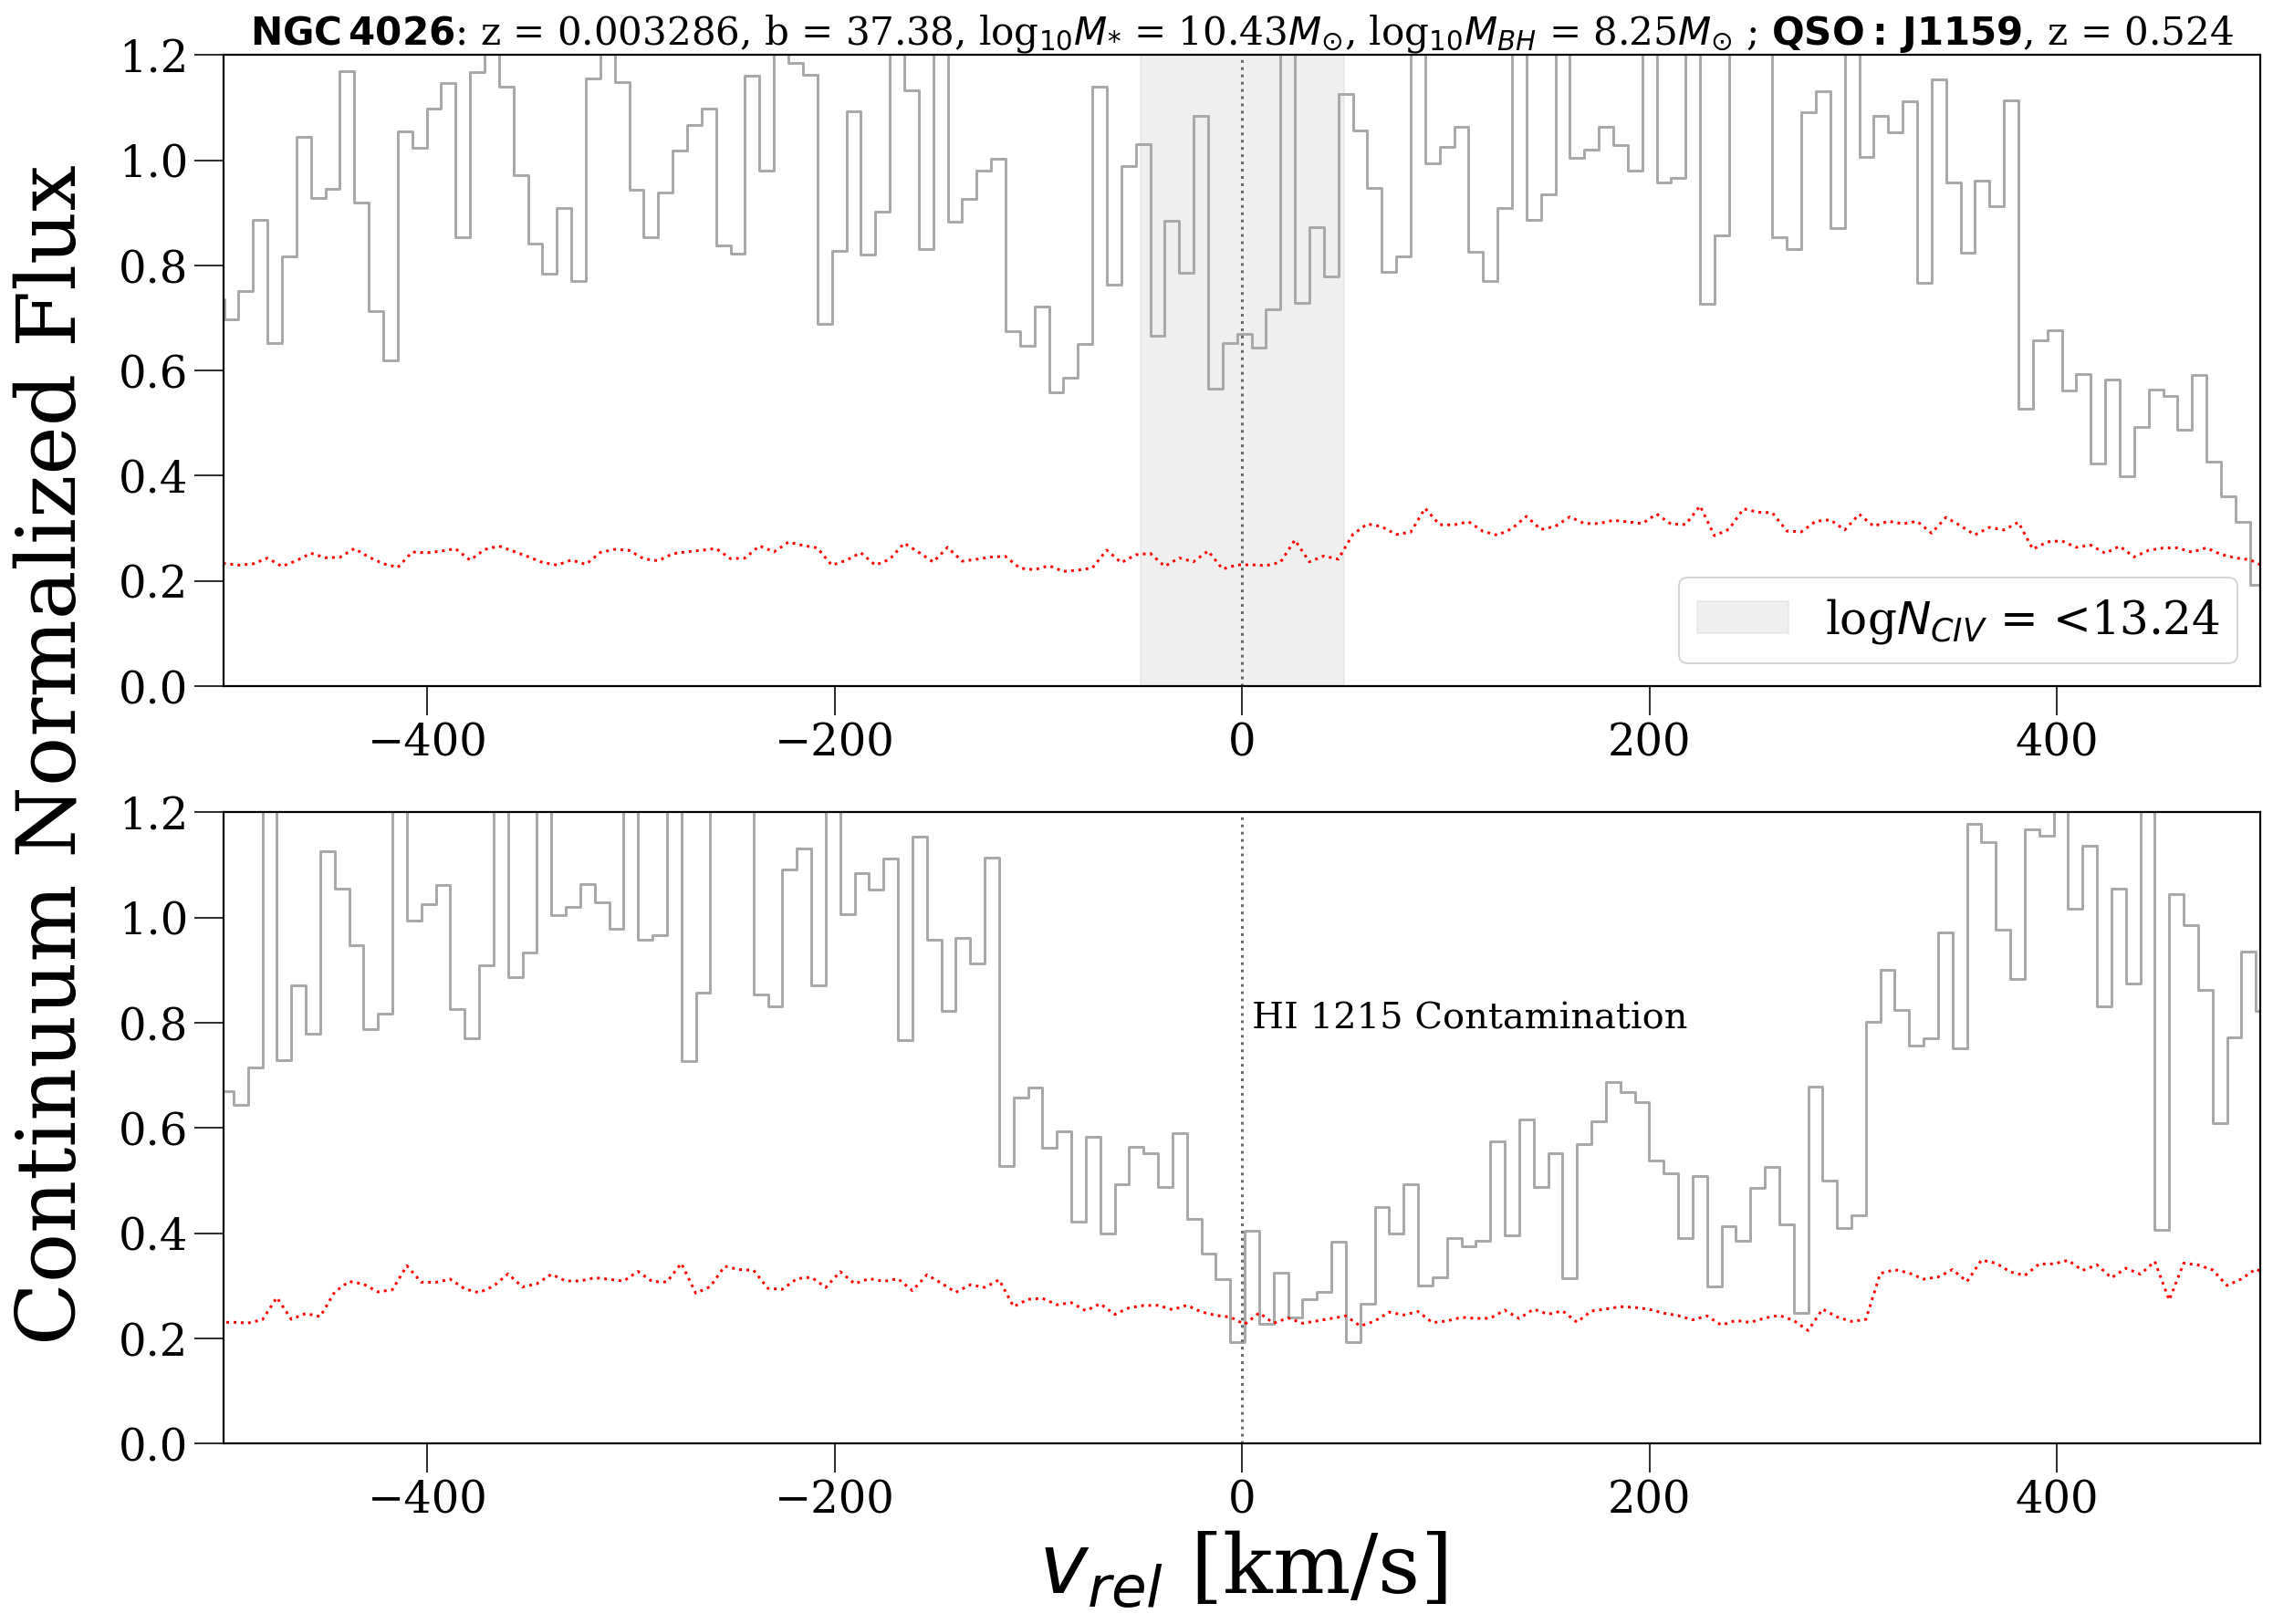

In [24]:
# J1159 - Unsmoothed spectra 
J1159_vsp(xspec_J1159, Vels_J1159, Voigt_J1159) #Looks much better, don't know why HI is not running through the fit
#plt.savefig('Figures_noMW/J1159_vsp.png', pad_inches=0.05)

In [27]:
#################################################################
    
#J1220
def J1220_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548 (0)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[0].axvspan(-650, -300, alpha = 0.35, color = 'lightgrey') 
    axs[0].axvspan(-50, 50, alpha = 0.35, color = 'lightgrey', label=r'log$N_{CIV}$ = <13.47')
    #axs[0].plot(Vels[0]+vel_J1220[0], Voigt[0].flux, c=CB_color_cycle[6], lw=5, label = labels_J1220[0] ) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-500,500)
    axs[0].set_ylim(0,1.2)
    #axs[0].set_title('Galaxy (NGC 4258): z = 0.001494, b = 69.78, log$_{10}$$M_{*}$ = 10.88$M_{\odot}$, log$_{10}$$M_{BH}$ = 7.58$M_{\odot}$; QSO: J1220+4643, z = 0.707',fontsize=16.5)
    axs[0].set_title(r"$\bf{NGC \, 4258}$" + ': z = 0.001494, b = 69.78, log$_{10}$$M_{*}$ = 10.88$M_{\odot}$, log$_{10}$$M_{BH}$ = 7.58$M_{\odot}$ ; ' + r"$\bf{QSO: \, J1220}$" + ', z = 0.707',  fontsize=21)
    #axs[0].annotate('MW Contamination', (-155, 1.1), fontsize=17)
    #axs[0].annotate('$\chi^{2}$ = 1.56', (-1390, 0.05), fontsize=15)
    axs[0].legend(loc=4, fontsize=25)

    #CIV 1550 (1)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-50, 50, alpha = 0.35, color = 'lightgrey', label=r'log$N_{CIV}$ = <13.47')
    #axs[1].plot(Vels[1]+vel_J1220[1], Voigt[1].flux, c=CB_color_cycle[6], lw=5, label = labels_J1220[1] ) 
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-500,500)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4, fontsize=25)
    #axs[1].annotate('$\chi^{2}$ = 1.56', (-1390, 0.05), fontsize=15)
    axs[1].set_xlabel('$v_{rel}$ [km/s]', fontsize=45)
    fig.text(0.06, 0.5, 'Continuum Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=45)

    
#################################################################


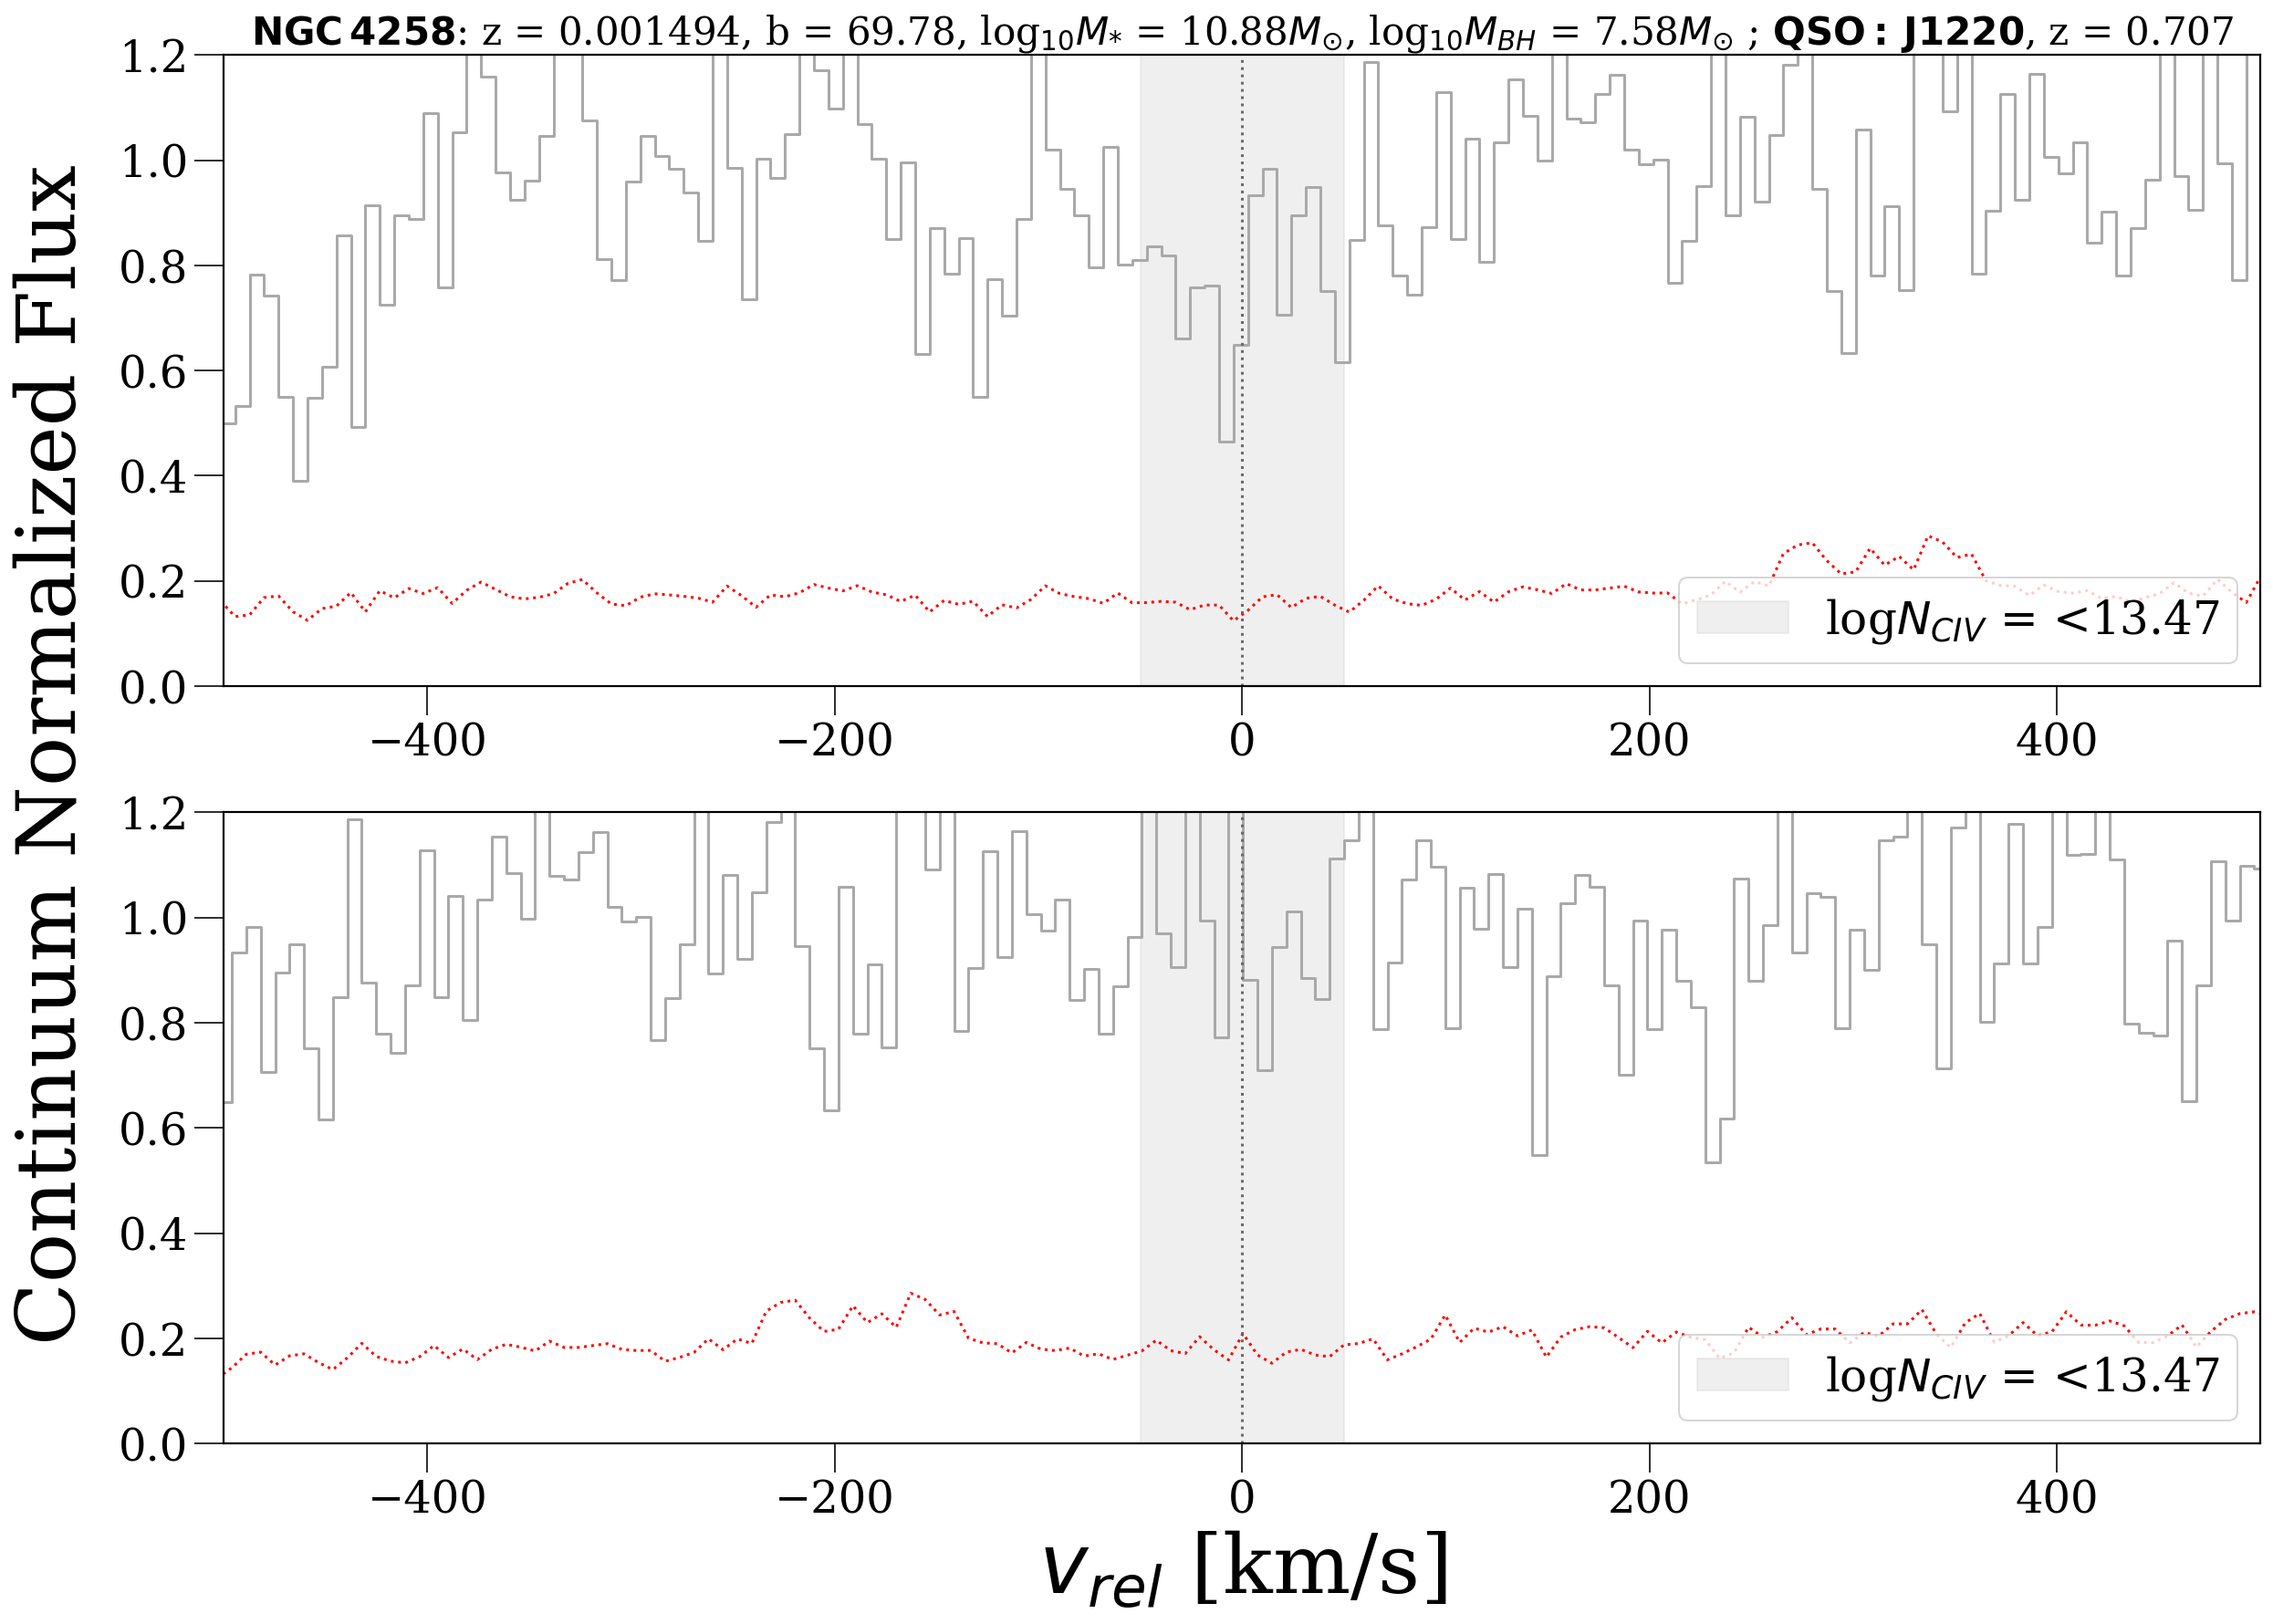

In [29]:
J1220_vsp(xspec_J1220, Vels_J1220, Voigt_J1220)
#plt.savefig('Figures_noMW/J1220_vsp.png', pad_inches=0.05)

In [30]:
#################################################################
#J1222
def J1222_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548 (0)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-50, 50, alpha = 0.35, color = 'lightgrey', label=r'log$N_{CIV}$ = <13.39')
    #axs[0].plot(Vels[0]+vel_J1222[0], Voigt[0].flux, c=CB_color_cycle[6], lw=5, label = labels_J1222[0] ) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-500,500)
    axs[0].set_ylim(0,1.2)
    #axs[0].set_title('Galaxy (NGC 4258): z = 0.001494, b = 130.30, log$_{10}$$M_{*}$ = 10.88$M_{\odot}$, log$_{10}$$M_{BH}$ = 7.58$M_{\odot}$; QSO: J1222+4612, z = 0.111',fontsize=16.5)
    axs[0].set_title(r"$\bf{NGC \, 4258}$" + ': z = 0.001494, b = 130.30, log$_{10}$$M_{*}$ = 10.88$M_{\odot}$, log$_{10}$$M_{BH}$ = 7.58$M_{\odot}$ ; ' + r"$\bf{QSO: \, J1222}$" + ', z = 0.111',  fontsize=21)
    #axs[0].annotate('MW Contamination', (-145, 1.1), fontsize=17)
    #axs[0].annotate('$\chi^{2}$ = 1.56', (-1390, 0.05), fontsize=15)
    axs[0].legend(loc=4, fontsize=25)

    #CIV 1550 (1)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-50, 50, alpha = 0.35, color = 'lightgrey', label=r'log$N_{CIV}$ = <13.39')
    #axs[1].plot(Vels[1]+vel_J1222[1], Voigt[1].flux, c=CB_color_cycle[6], lw=5, label = labels_J1222[1] ) 
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-500,500)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4, fontsize=25)
    #axs[1].annotate('$\chi^{2}$ = 1.56', (-1390, 0.05), fontsize=15)
    axs[1].set_xlabel('$v_{rel}$ [km/s]', fontsize=45)
    fig.text(0.06, 0.5, 'Continuum Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=45)

#################################################################

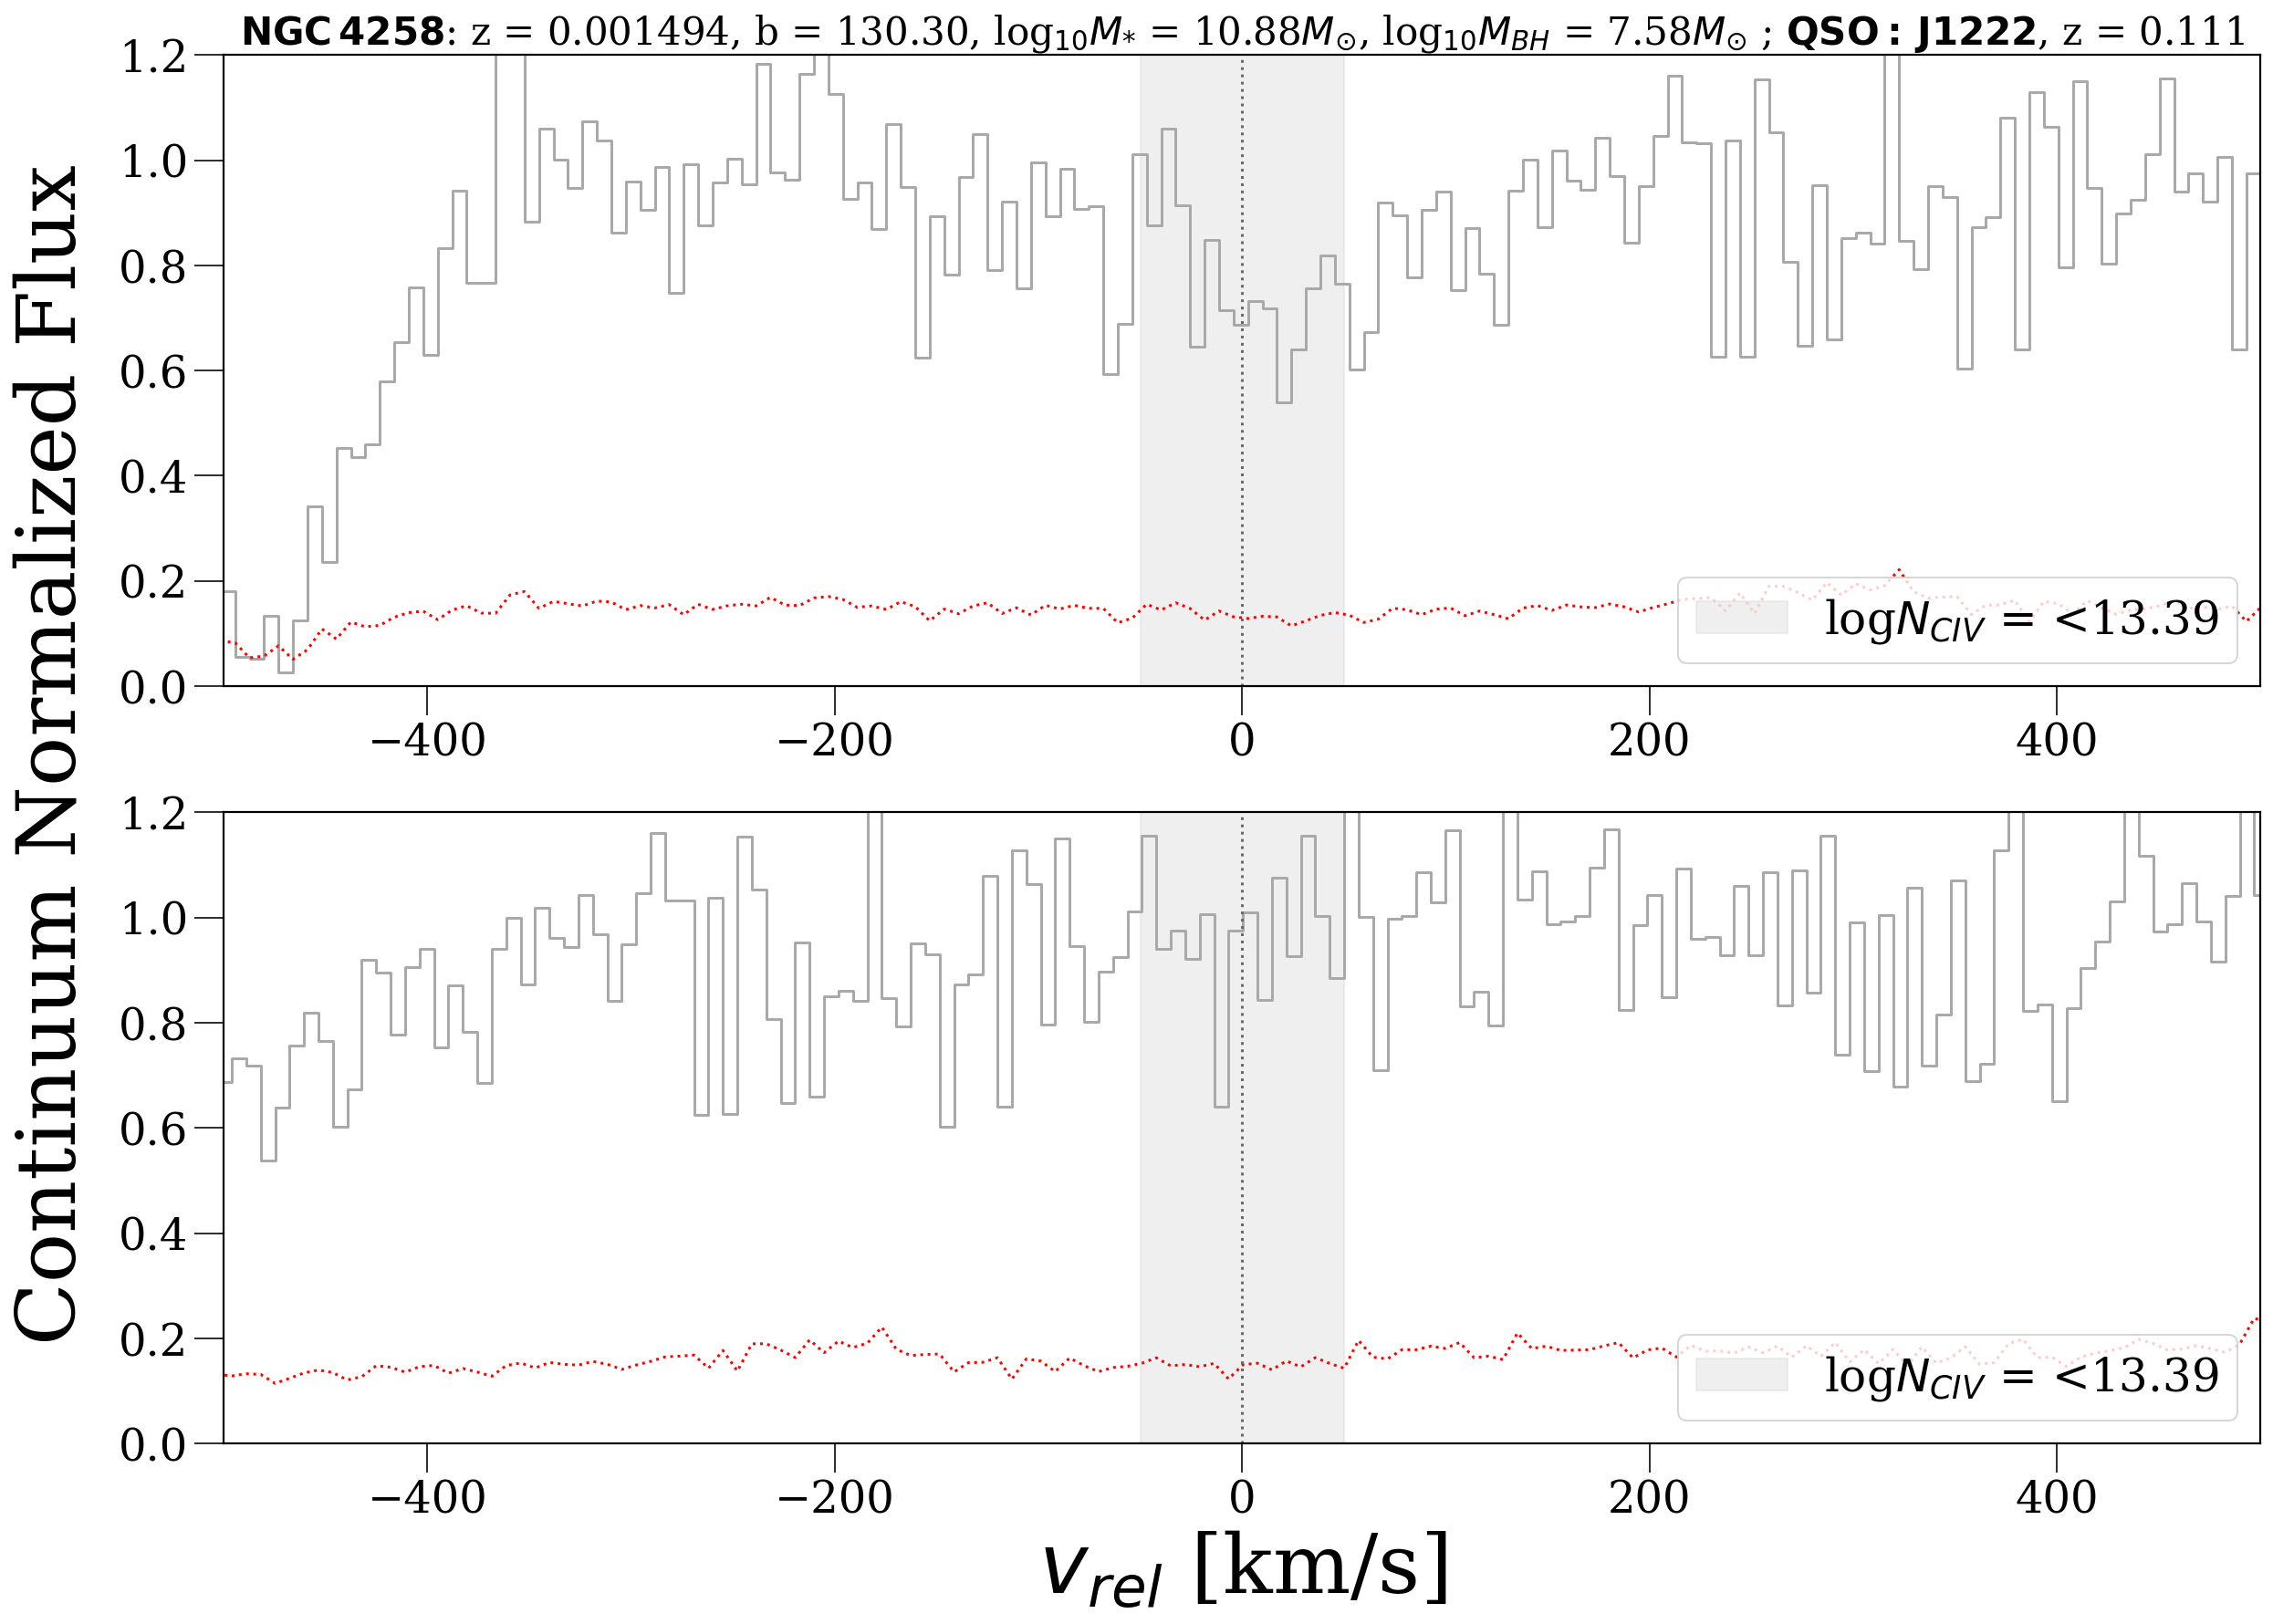

In [32]:
J1222_vsp(xspec_J1222, Vels_J1222, Voigt_J1222)
#plt.savefig('Figures_noMW/J1222_vsp.png', pad_inches=0.05)

In [56]:
#################################################################

#J1249
def J1249_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548 (0 ,2, 4, 6)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[0].axvspan(-450, -250, alpha = 0.35, color = 'lightgrey')
    #axs[0].axvspan(-200, -32, alpha = 0.35, color = 'lightblue')
    #axs[0].plot(Vels[0]+vel_J1249[0], Voigt[0].flux, c=CB_color_cycle[6], lw=5)  
    axs[0].plot(Vels[2]+vel_J1249[2], Voigt[2].flux, c='#0000ff', lw=5, label = labels_J1249[2])  
    axs[0].plot(Vels[4]+vel_J1249[4], Voigt[4].flux, c='#0000ff', lw=5, label = labels_J1249[4])  
    axs[0].plot(Vels[6]+vel_J1249[6], Voigt[6].flux, c='#0000ff', lw=5, label = labels_J1249[6] )
    axs[0].plot(Vels[0], xspec_J1249.sig/xspec_J1249.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-500,500)
    axs[0].set_ylim(0,1.2)
    #axs[0].set_title('Galaxy (NGC 4736): z = 0.001027, b = 25.52, log$_{10}$$M_{*}$ = 10.62$_{10}$$M_{\odot}$, log$M_{BH}$ = 6.83$M_{\odot}$; QSO: J1249+4122, z = 0.3682',fontsize=16.5)
    axs[0].set_title(r"$\bf{NGC \, 4736}$" + ': z = 0.001027, b = 25.52, log$_{10}$$M_{*}$ = 10.62$_{10}$$M_{\odot}$, log$M_{BH}$ = 6.83$M_{\odot}$ ; ' + r"$\bf{QSO: \, J1249}$" + ', z = 0.368',  fontsize=21)
    axs[0].annotate('$\chi^{2}$ = 0.91', (-490, 0.05), fontsize=25)
    axs[0].legend(loc=4)

    #CIV 1550 (1, 3, 5, 7)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[1].axvspan(-450, -250, alpha = 0.35, color = 'lightgrey')
    #axs[1].axvspan(-200, -32, alpha = 0.35, color = 'lightblue')
    #axs[1].plot(Vels[1]+vel_J1249[1], Voigt[1].flux, c=CB_color_cycle[6], lw=5) 
    axs[1].plot(Vels[3]+vel_J1249[3], Voigt[3].flux, c='#0000ff', lw=5, label = labels_J1249[3]) 
    axs[1].plot(Vels[5]+vel_J1249[5], Voigt[5].flux, c='#0000ff', lw=5, label = labels_J1249[5]) 
    axs[1].plot(Vels[7]+vel_J1249[7], Voigt[7].flux, c='#0000ff', lw=5, label = labels_J1249[7]) 
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-500,500)
    axs[1].set_ylim(0,1.2)
    axs[1].set_xlabel('$v_{rel}$ [km/s]', fontsize=45)
    axs[1].annotate('$\chi^{2}$ = 0.91', (-490, 0.05), fontsize=25)
    axs[1].legend(loc=4)
    fig.text(0.06, 0.5, 'Continuum Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=45)


#################################################################

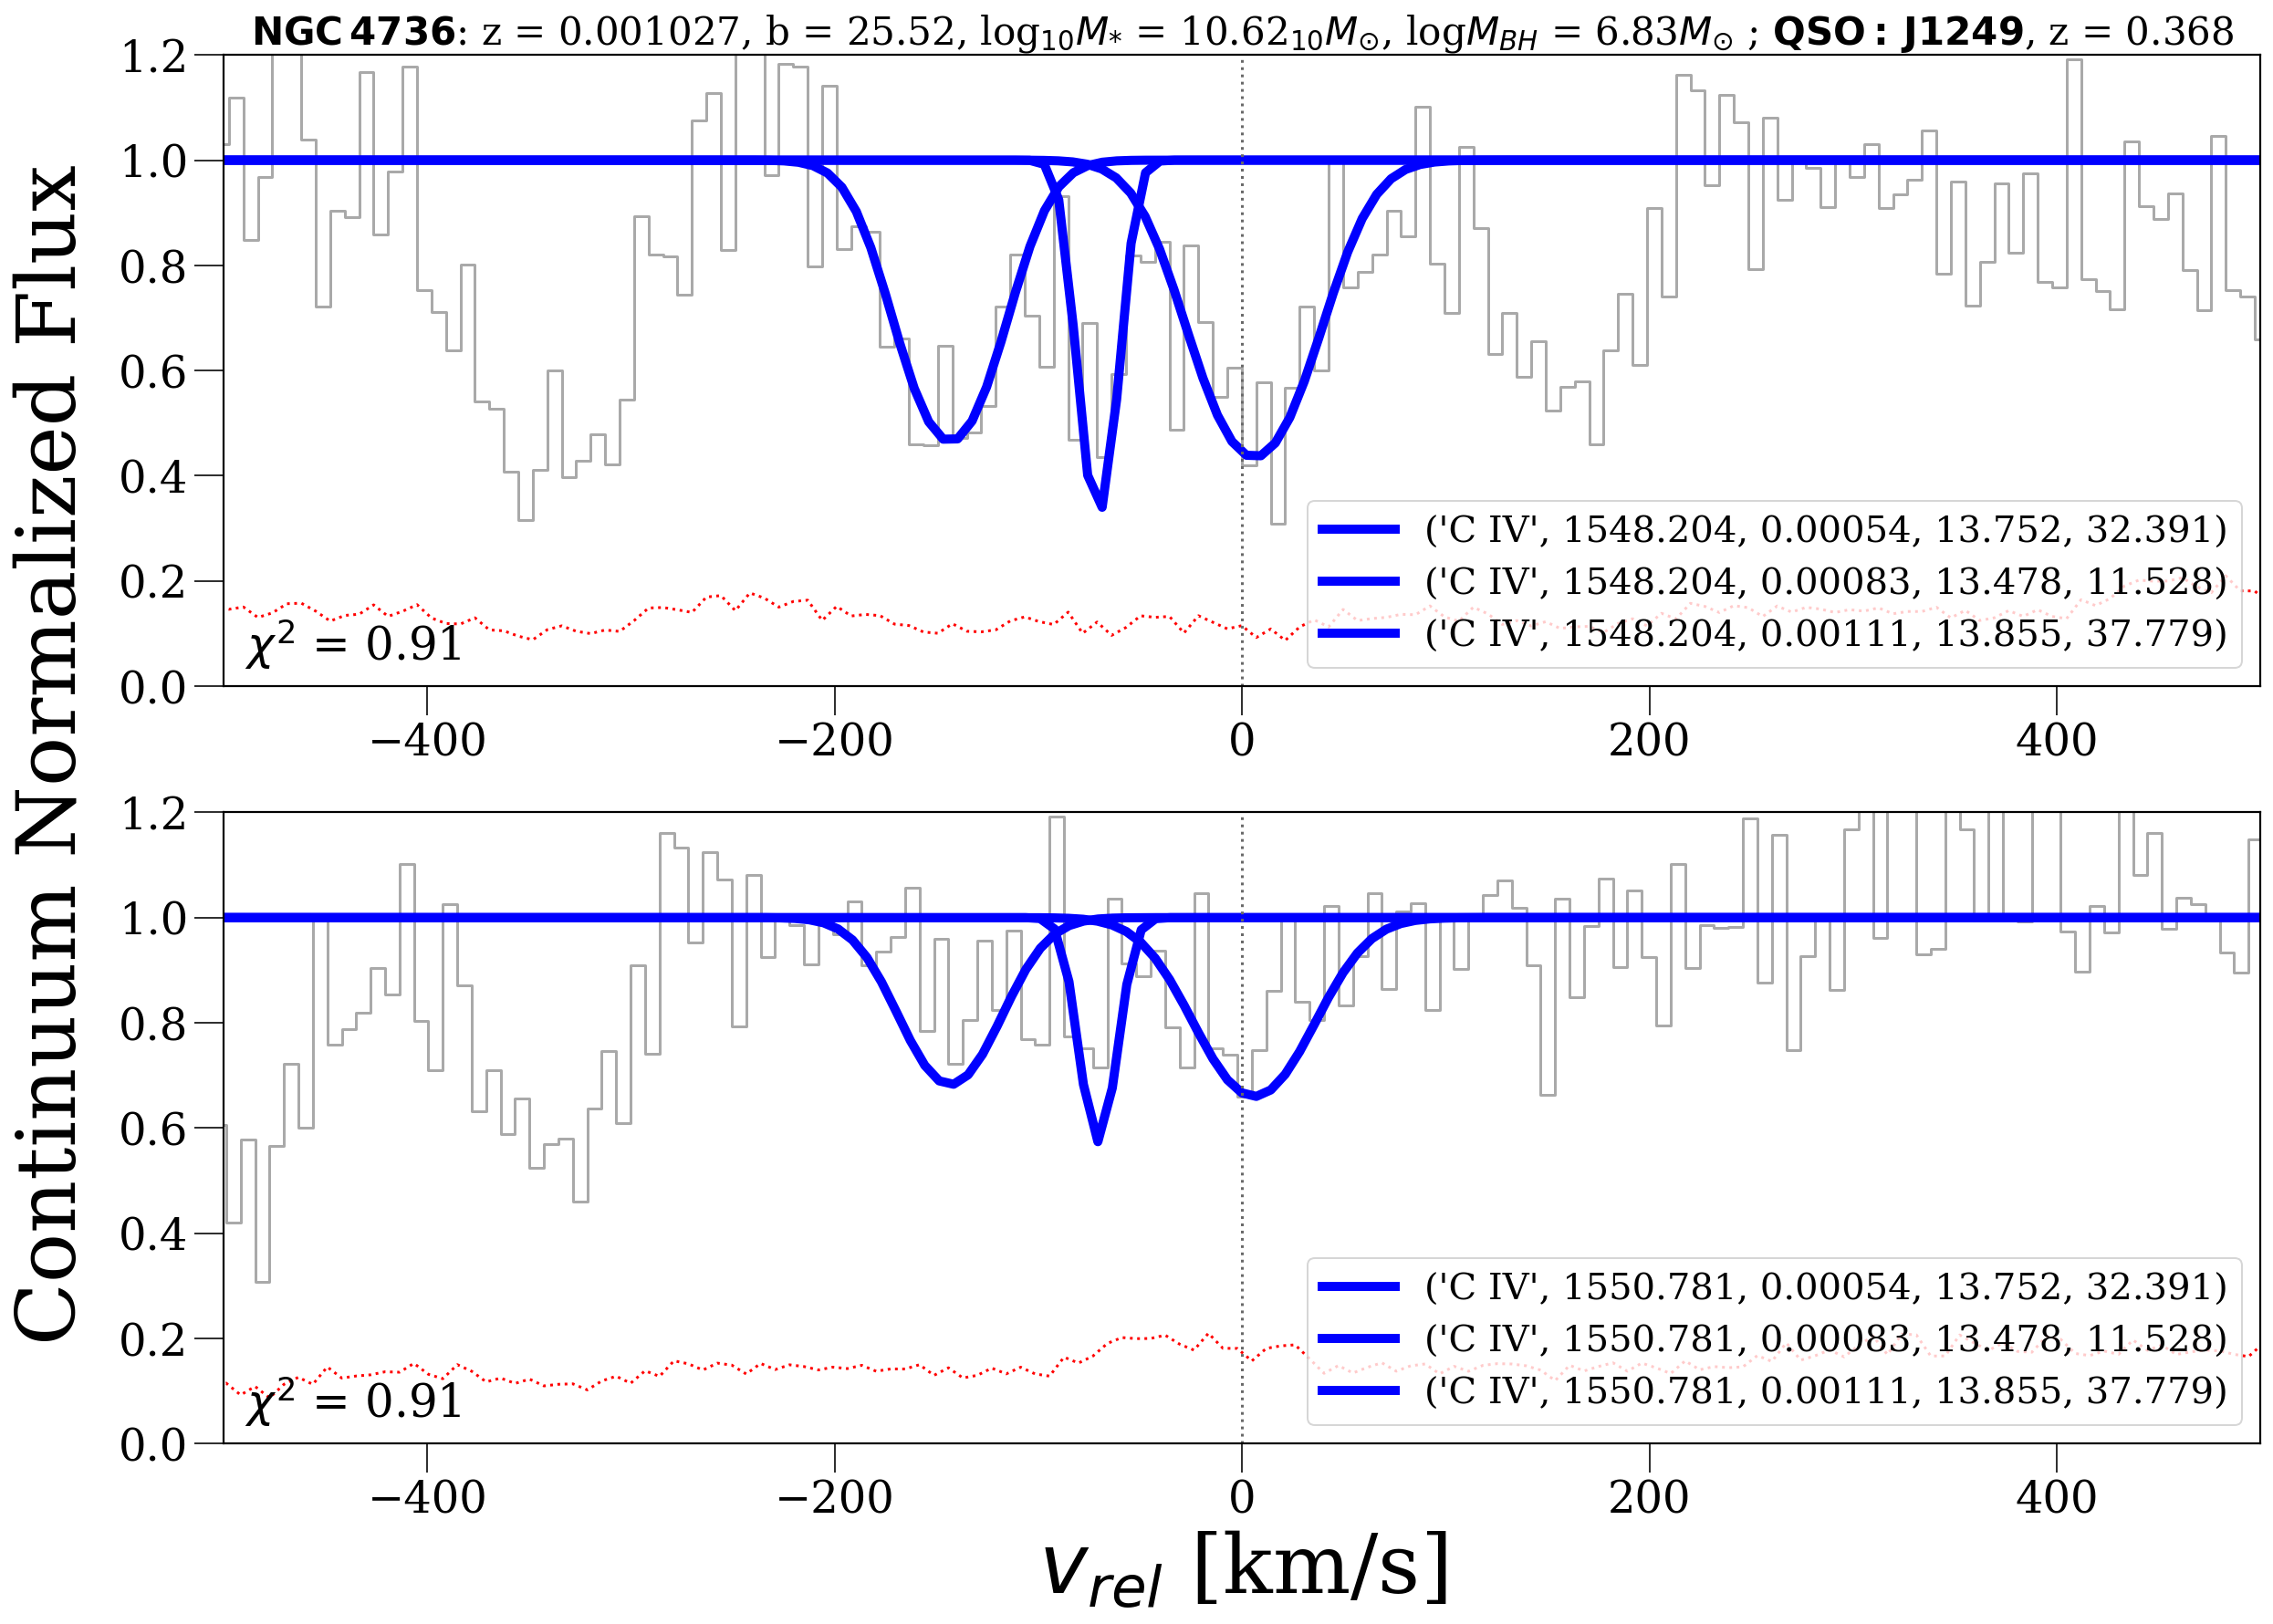

In [57]:
# J1249 - Unsmooth Spectra 
J1249_vsp(xspec_J1249, Vels_J1249, Voigt_J1249) 
plt.savefig('Figures_noMW/J1249_vsp.png', pad_inches=0.05)

In [59]:
#################################################################

#J1051
def J1051_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548 (0, 2, 4, 6)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[0].axvspan(-1700, -1250, alpha = 0.35, color = 'lightgrey')
    #axs[0].plot(Vels[0]+vel_J1051[0], Voigt[0].flux, c=CB_color_cycle[6], lw=5)  
    #axs[0].plot(Vels[2]+vel_J1051[2], Voigt[2].flux, c=CB_color_cycle[6], lw=5) 
    #axs[0].plot(Vels[4]+vel_J1051[4], Voigt[4].flux, c=CB_color_cycle[6], lw=5) 
    axs[0].plot(Vels[6]+vel_J1051[6], Voigt[6].flux, c='#00ff80', lw=5, label = labels_J1051[6] ) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-500,500)
    axs[0].set_ylim(0,1.2)
    #axs[0].annotate('Milky Way CIV', (-1620, 1.1), fontsize=17)
    axs[0].set_title(r"$\bf{NGC \, 3414}$" + ': z = 0.0049, b = 40.499, log$_{10}$$M_{*}$ = 10.79$M_{\odot}$, log$_{10}$$M_{BH}$ = 8.40$M_{\odot}$; ' + r"$\bf{QSO: \, J1051}$" + ', z = 0.423',  fontsize=21)
    axs[0].annotate('$\chi^{2}$ = 0.87', (-490, 0.05), fontsize=25)
    axs[0].legend(loc=4, fontsize=25)

    #CIV 1550 (1, 3, 5, 7)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[1].axvspan(-1700, -1250, alpha = 0.35, color = 'lightgrey')
    #axs[1].plot(Vels[1]+vel_J1051[1], Voigt[1].flux, c=CB_color_cycle[6], lw=5)
    #axs[1].plot(Vels[3]+vel_J1051[3], Voigt[3].flux, c=CB_color_cycle[6], lw=5)
    #axs[1].plot(Vels[5]+vel_J1051[5], Voigt[5].flux, c=CB_color_cycle[6], lw=5)
    axs[1].plot(Vels[7]+vel_J1051[7], Voigt[7].flux, c='#00ff80', lw=5, label = labels_J1051[7])
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-500,500)
    axs[1].set_ylim(0,1.2)
    axs[1].set_xlabel('$v_{rel}$ [km/s]', fontsize=45)
    axs[1].annotate('$\chi^{2}$ = 0.87', (-490, 0.05), fontsize=25)
    #axs[1].annotate('Milky Way CIV', (-1620, 1.1), fontsize=17)
    axs[1].legend(loc=4, fontsize=25)
    fig.text(0.06, 0.5, 'Continuum Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=45)
    
#################################################################

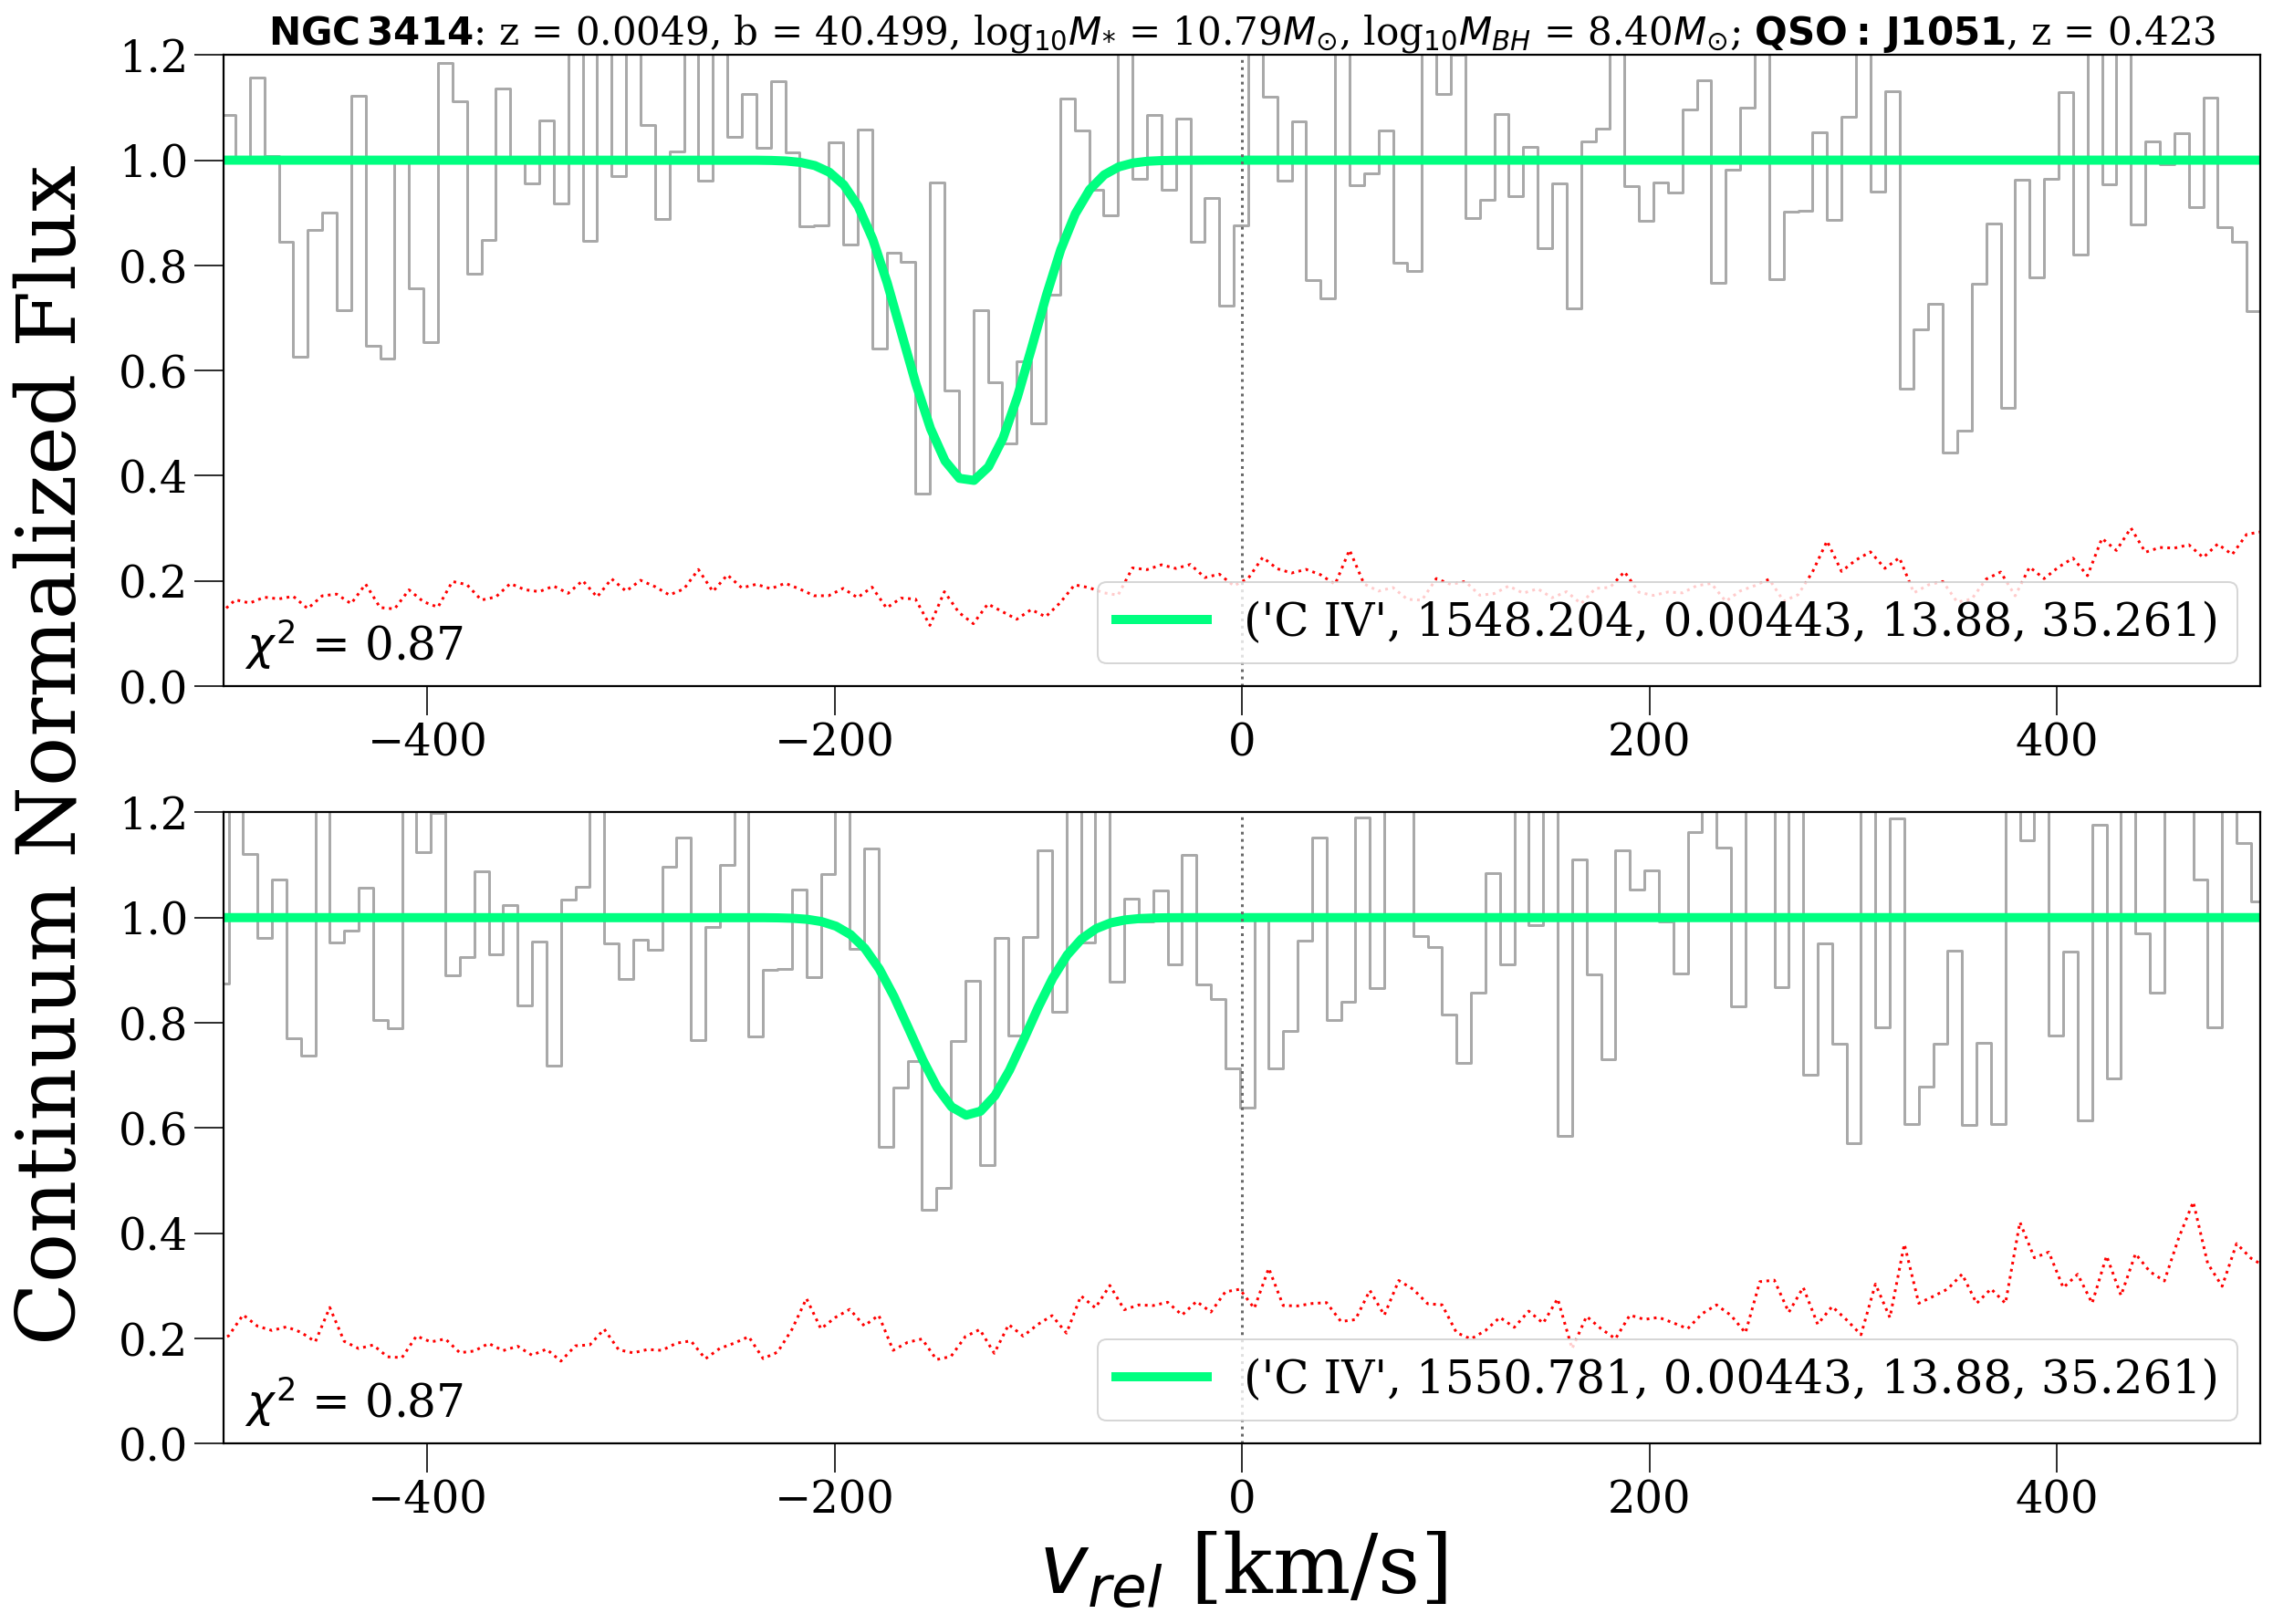

In [60]:
# J1051 Specra 
J1051_vsp(xspec_J1051, Vels_J1051, Voigt_J1051)
plt.savefig('Figures_noMW/J1051_vsp.png', pad_inches=0.05)

In [61]:
#################################################################
    
#J1123
def J1123_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548 (0,2)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[0].axvspan(-825, -575, alpha = 0.35, color = 'lightgrey')
    #axs[0].plot(Vels[0]+vel_J1123[0], Voigt[0].flux, c=CB_color_cycle[6], lw=5) 
    axs[0].plot(Vels[2]+vel_J1123[2], Voigt[2].flux, c='#0000ff', lw=5, label = labels_J1123[2]) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-500,500)
    axs[0].set_ylim(0,1.2)
    #axs[0].set_title('Galaxy (NGC 3627): z = 0.00243, b = 119.976, log$_{10}$$M_{*}$ = 10.84$M_{\odot}$,log$_{10}$$M_{BH}$ = 6.92$M_{\odot}$; QSO: J1123+1257, z = 0.315',fontsize=16.5)
    axs[0].set_title(r"$\bf{NGC \, 3627}$" + ': z = 0.00243, b = 119.976, log$_{10}$$M_{*}$ = 10.84$M_{\odot}$,log$_{10}$$M_{BH}$ = 6.92$M_{\odot}$; ' + r"$\bf{QSO: \, J1123}$" + ', z = 0.315',  fontsize=21)
    axs[0].annotate('$\chi^{2}$ = 0.79', (-490, 0.05), fontsize=25)
    axs[0].legend(loc=4, fontsize=25)

    #CIV 1550 (1,3)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[1].axvspan(-825, -575, alpha = 0.35, color = 'lightgrey')
    #axs[1].plot(Vels[1]+vel_J1123[1], Voigt[1].flux, c=CB_color_cycle[6], lw=5)
    axs[1].plot(Vels[3]+vel_J1123[3], Voigt[3].flux, c='#0000ff', lw=5, label = labels_J1123[3] ) 
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-500,500)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4, fontsize=25)
    axs[1].annotate('$\chi^{2}$ = 0.79', (-490, 0.05), fontsize=25)
    axs[1].set_xlabel('$v_{rel}$ [km/s]', fontsize=45)
    fig.text(0.06, 0.5, 'Continuum Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=45)
    
#################################################################

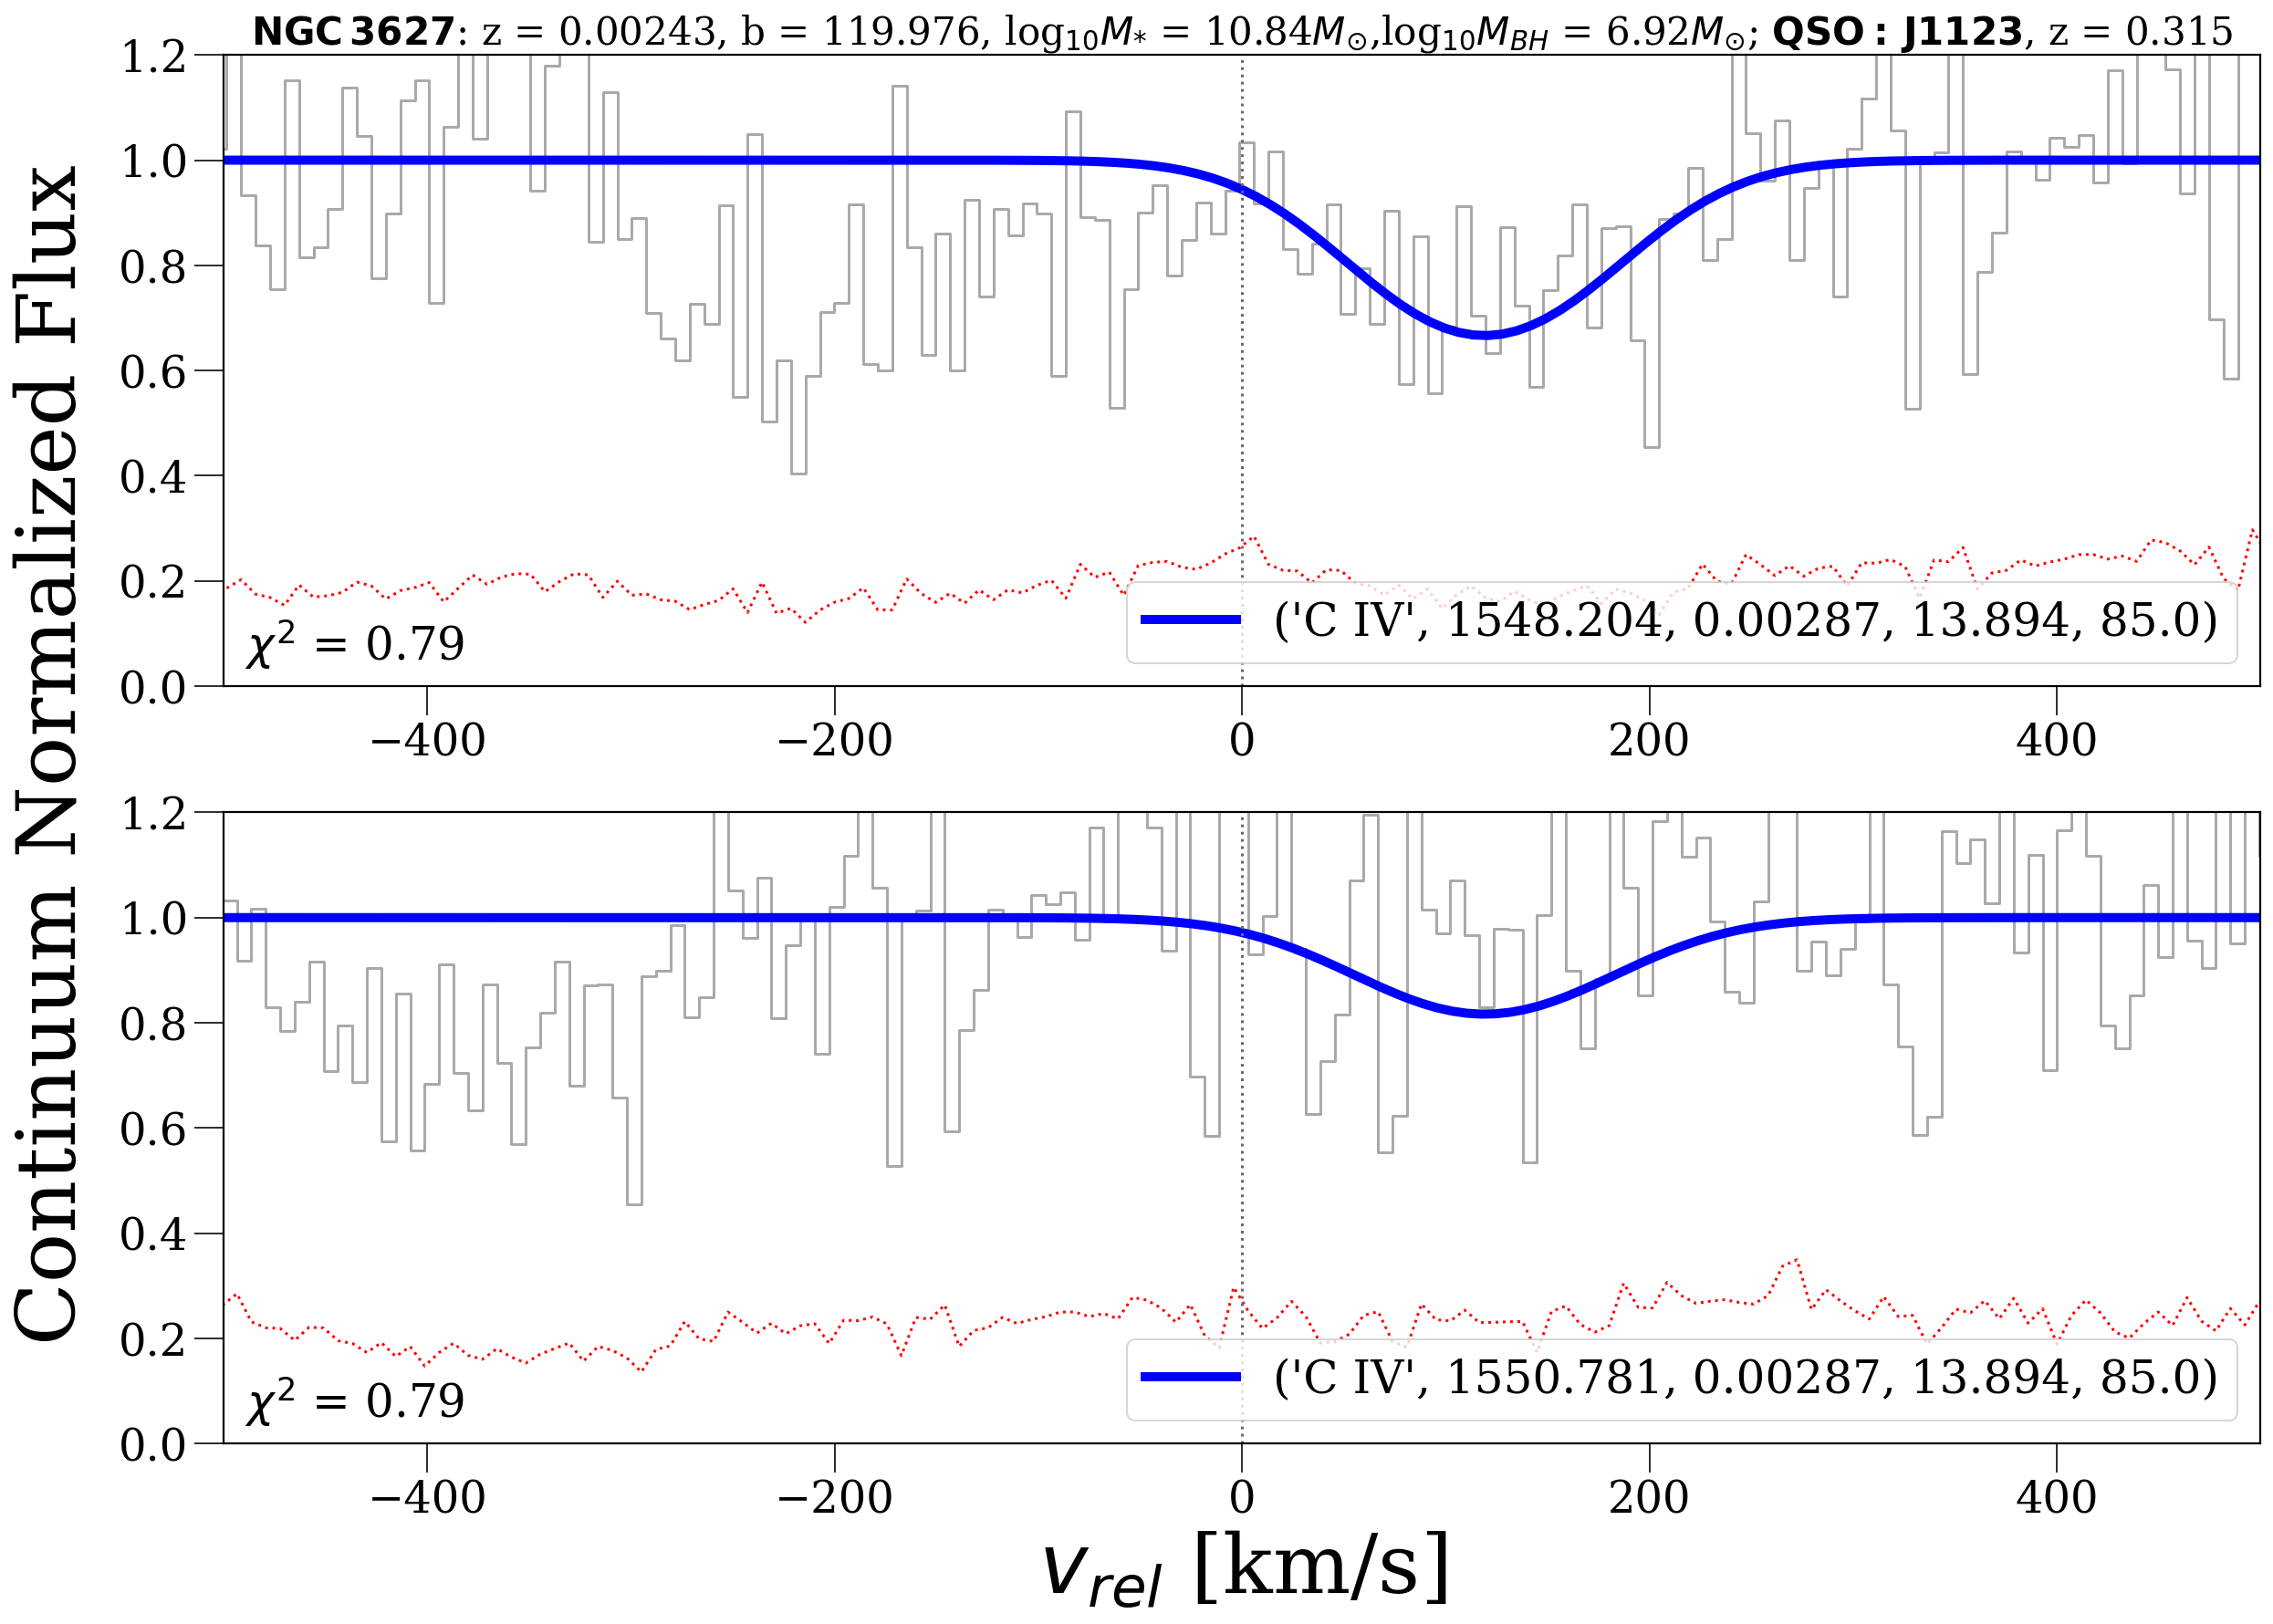

In [62]:
# J1123 Unsmoothed Spectra 
J1123_vsp(xspec_J1123, Vels_J1123, Voigt_J1123) 
plt.savefig('Figures_noMW/J1123_vsp.png', pad_inches=0.05)

In [63]:
#################################################################

#J0246
def J0246_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548 (0)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[0].axvspan(-1350, -1150, alpha = 0.35, color = 'lightgrey')
    #axs[0].plot(Vels[0]+vel_J0246[0], Voigt[0].flux, c=CB_color_cycle[6], lw=5) 
    axs[0].plot(Vels[2]+vel_J0246[2], Voigt[2].flux, c='#00ff80', lw=5, label = labels_J0246[2])
    axs[0].plot(Vels[4]+vel_J0246[4], Voigt[4].flux, c='#00ff80', lw=5, label = labels_J0246[4])
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-500,500)
    axs[0].set_ylim(0,1.2)
    #axs[0].set_title('Galaxy (NGC 1097): z = 0.00424, b = 55.66, log$_{10}$$M_{*}$ = 10.5$M_{\odot}$, log$_{10}$$M_{BH}$ = 8.14$M_{\odot}$; QSO: J0246-3007, z = 0.524',fontsize=16.5)
    axs[0].set_title(r"$\bf{NGC \, 1097}$" + ': z = 0.00424, b = 55.66, log$_{10}$$M_{*}$ = 10.5$M_{\odot}$, log$_{10}$$M_{BH}$ = 8.14$M_{\odot}$; ' + r"$\bf{QSO: \, J0246}$" + ', z = 0.524',  fontsize=22)
    axs[0].annotate('$\chi^{2}$ = 0.90', (-490, 0.05), fontsize=25)
    axs[0].legend(loc=4, fontsize=19)

    #CIV 1550 (1)
    axs[1].step(Vels[1], xspec.flux/xspec_J0246.co, c='darkgray') # Plot continuum-normalized spectrum
    #axs[1].axvspan(-1350, -1150, alpha = 0.35, color = 'lightgrey')
    #axs[1].plot(Vels[1]+vel_J0246[1], Voigt[1].flux, c=CB_color_cycle[6], lw=5)
    axs[1].plot(Vels[3]+vel_J0246[3], Voigt[3].flux, c='#00ff80', lw=5, label = labels_J0246[3] )
    axs[1].plot(Vels[5]+vel_J0246[5], Voigt[5].flux, c='#00ff80', lw=5, label = labels_J0246[5] )
    axs[1].plot(Vels[3], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-500,500)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4,fontsize=25)
    axs[1].annotate('$\chi^{2}$ = 0.90', (-490, 0.05), fontsize=25)
    axs[1].set_xlabel('$v_{rel}$ [km/s]', fontsize=45)
    fig.text(0.06, 0.5, 'Continuum Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=45)
    
#################################################################

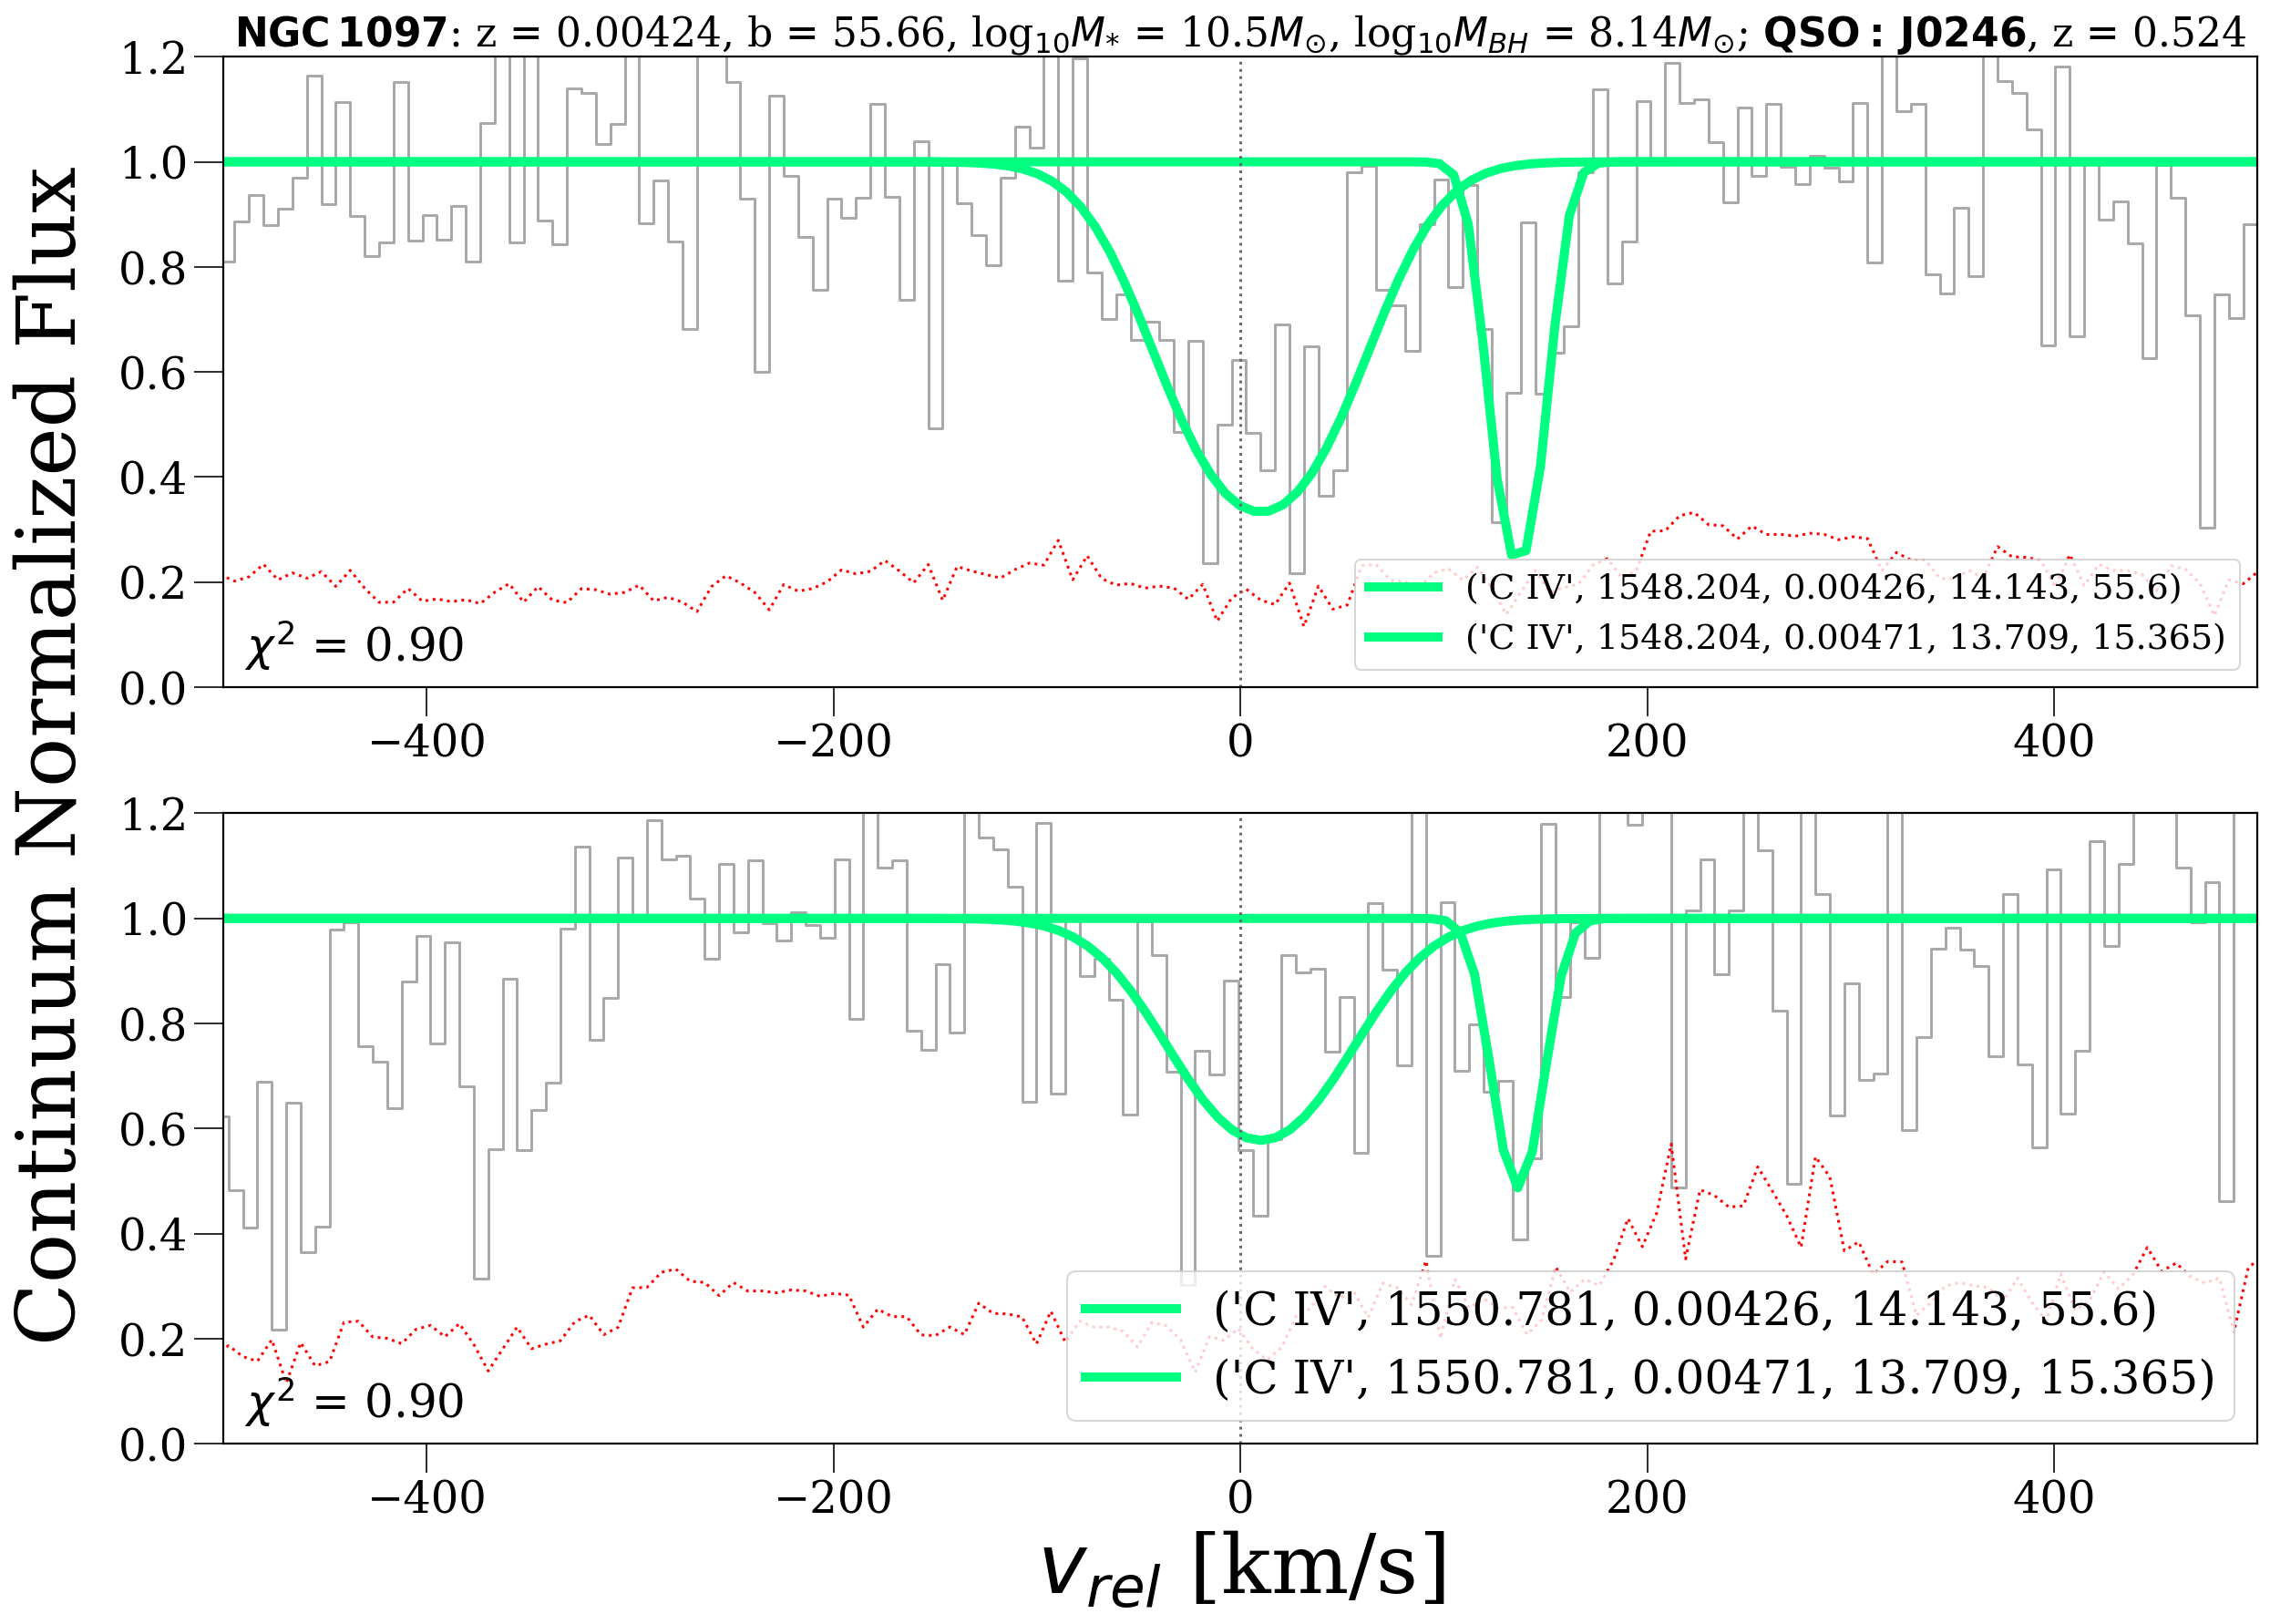

In [64]:
# J0246 - Unsmoothed Spectra 
J0246_vsp(xspec_J0246, Vels_J0246, Voigt_J0246)
plt.savefig('Figures_noMW/J0246_vsp.png', pad_inches=0.05)

In [33]:
#################################################################

#J1235
def J1235_vsp(xspec, Vels, Voigt): 
    #This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
    fig, axs = plt.subplots(2,1)

    #CIV 1548 (0)
    axs[0].step(Vels[0], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[0].axvspan(-50, 50, alpha = 0.35, color = 'lightgrey', label=r'log$N_{CIV}$ = <13.40')
    #axs[0].plot(Vels[0]+vel_J1235[0], Voigt[0].flux, c=CB_color_cycle[6], lw=5, label = labels_J1235[0]) 
    axs[0].plot(Vels[0], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[0].axvline(0, c='dimgray', ls=':')
    axs[0].set_xlim(-500,500)
    axs[0].set_ylim(0,1.2)
    #axs[0].set_title('Galaxy (NGC 4564): z = 0.0038, b = 123.08, log$_{10}$$M_{*}$ = 10.4$M_{\odot}$, log$_{10}$$M_{BH}$ = 7.94$M_{\odot}$; QSO: LBQS-1235+1123, z = 0.949',fontsize=16.5)
    axs[0].set_title(r"$\bf{NGC \, 4564}$" + ':z = 0.0038, b = 123.08, log$_{10}$$M_{*}$ = 10.4$M_{\odot}$, log$_{10}$$M_{BH}$ = 7.94$M_{\odot}$; ' + r"$\bf{QSO: \, J1235}$" + ', z = 0.949',  fontsize=22)
    axs[0].legend(loc=4, fontsize=25)

    #CIV 1550 (1)
    axs[1].step(Vels[1], xspec.flux/xspec.co, c='darkgray') # Plot continuum-normalized spectrum
    axs[1].axvspan(-50, 50, alpha = 0.35, color = 'lightgrey', label=r'log$N_{CIV}$ = <13.40')
    #axs[1].plot(Vels[1]+vel_J1235[1], Voigt[1].flux, c=CB_color_cycle[6], lw=5, label = labels_J1235[1]) 
    axs[1].plot(Vels[1], xspec.sig/xspec.co, c='red', ls=':') #error
    axs[1].axvline(0, c='dimgray', ls=':')
    axs[1].set_xlim(-500,500)
    axs[1].set_ylim(0,1.2)
    axs[1].legend(loc=4, fontsize=25)
    axs[1].set_xlabel('$v_{rel}$ [km/s]', fontsize=45)
    fig.text(0.06, 0.5, 'Continuum Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=45)
    
#################################################################

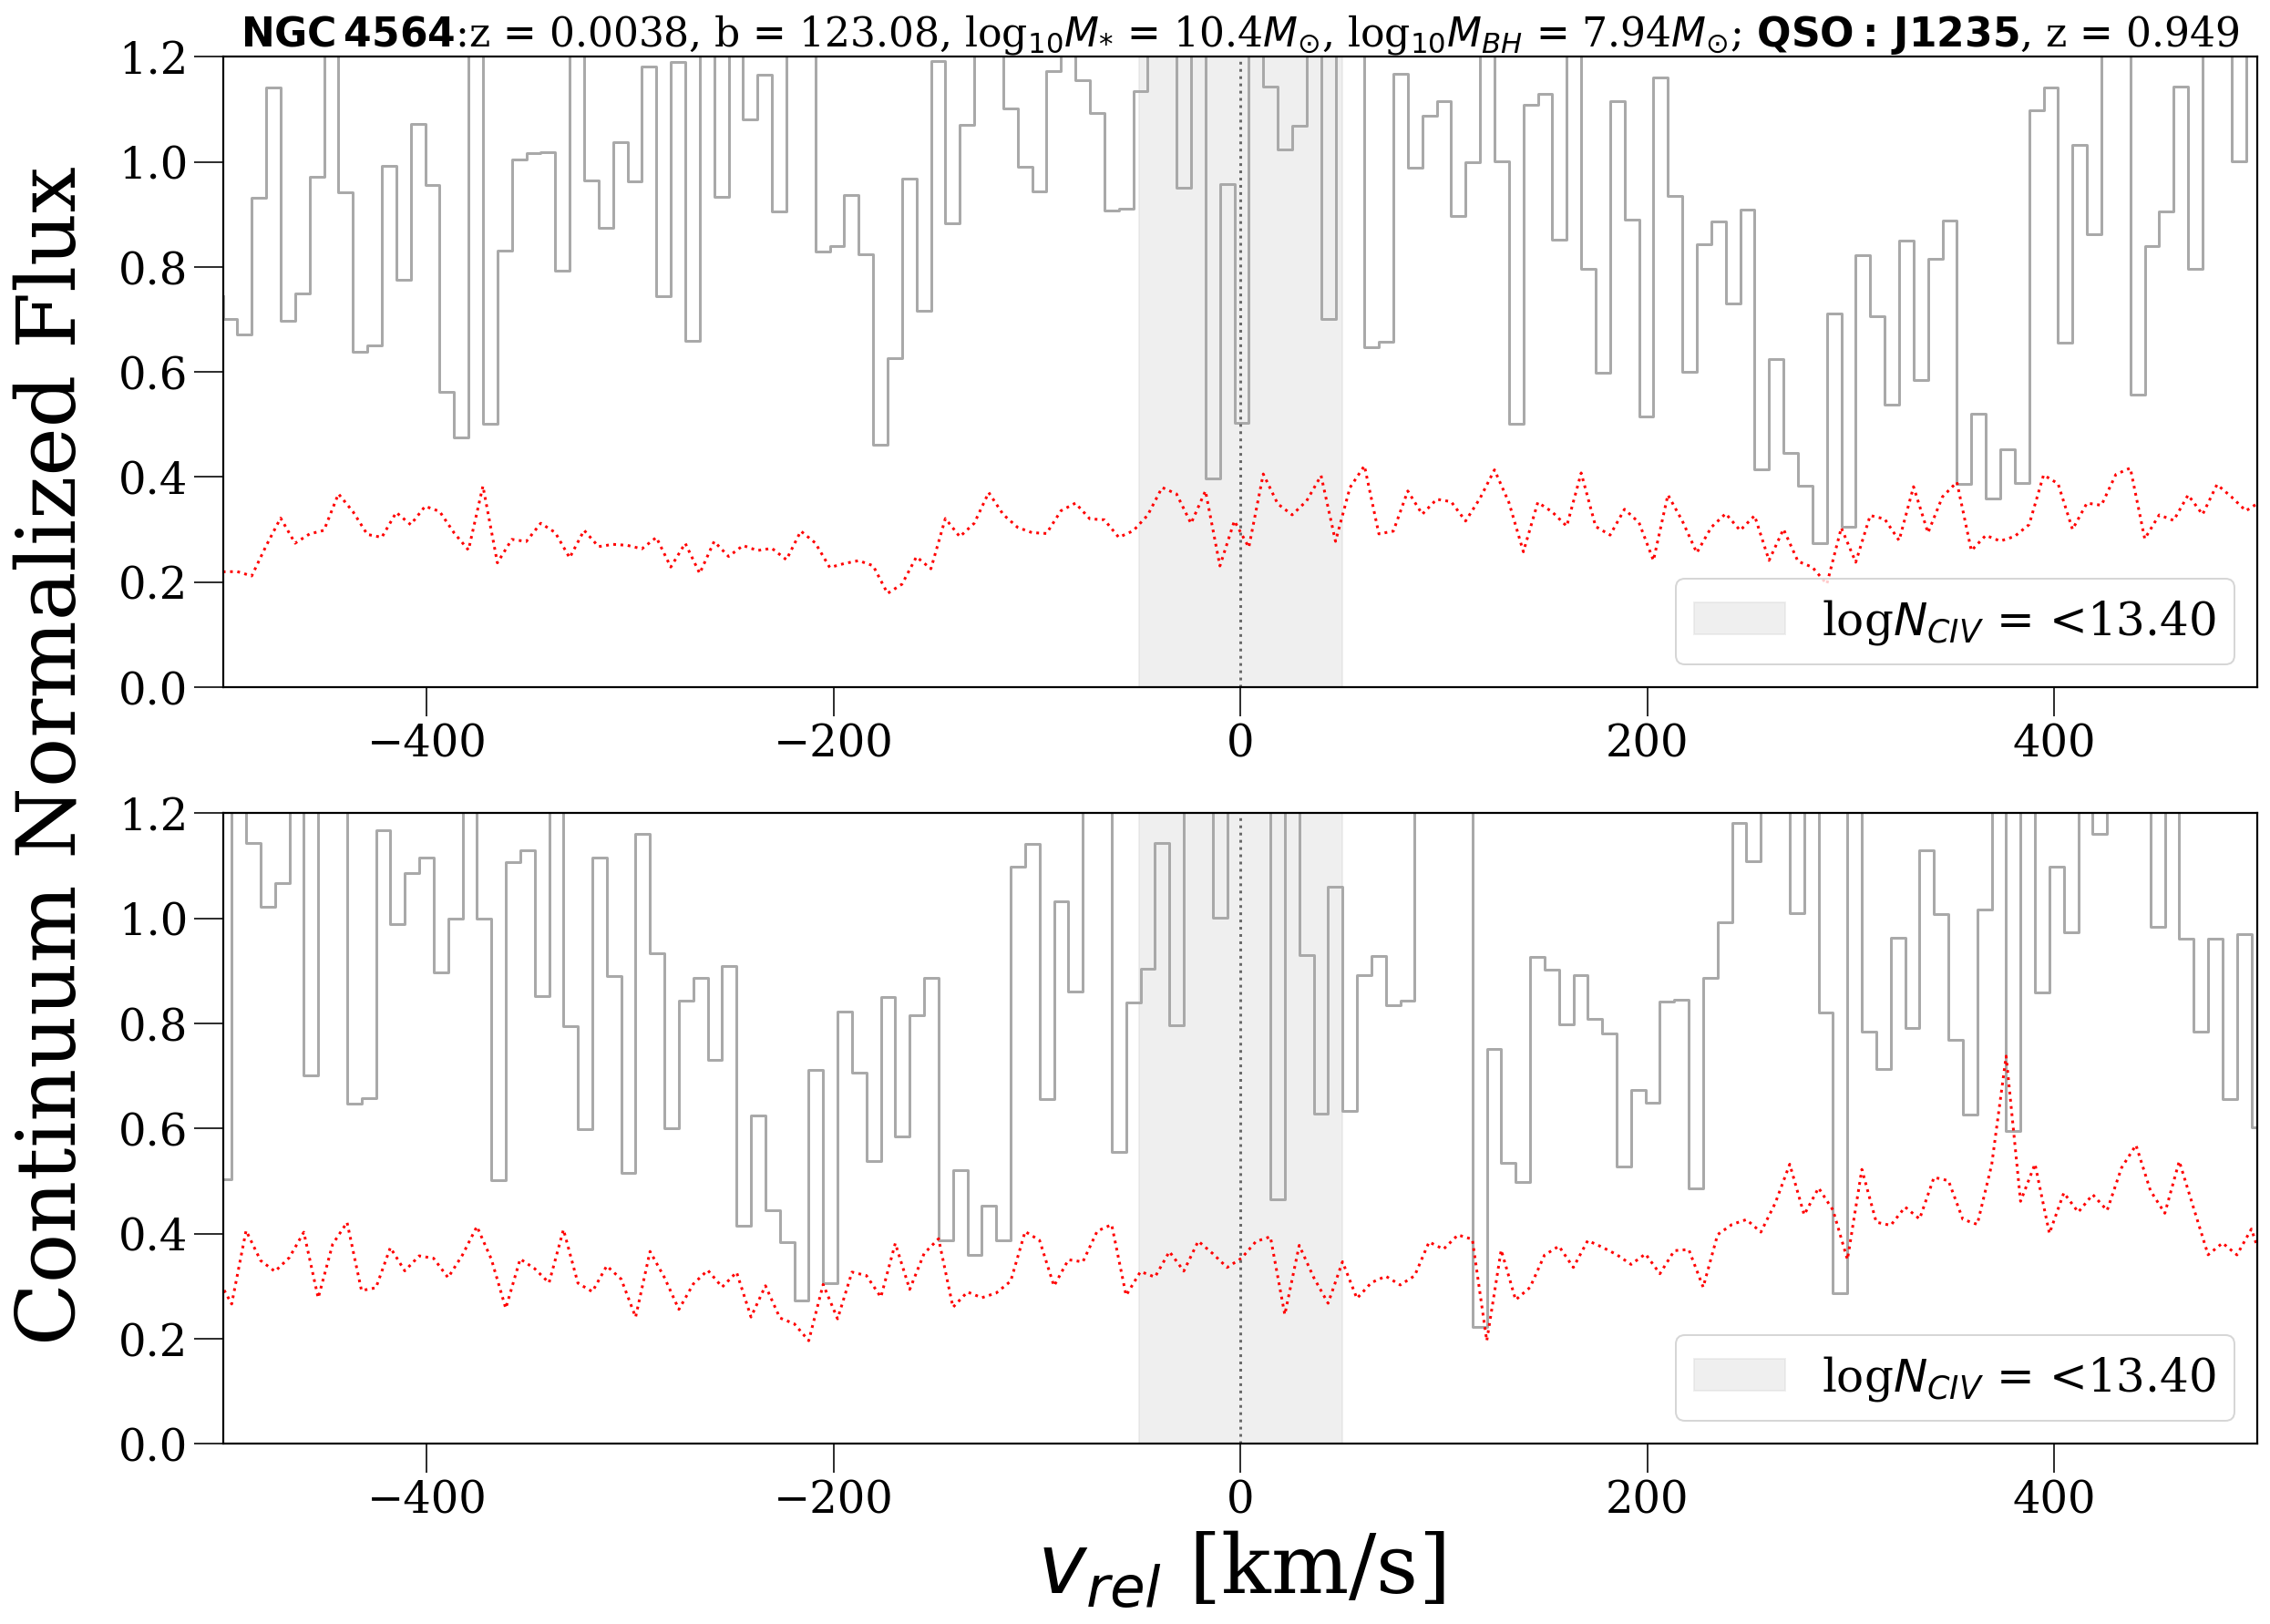

In [35]:
#### J1235 - Unsmoothed Spectra 
J1235_vsp(xspec_J1235, Vels_J1235, Voigt_J1235)
#plt.savefig('Figures_noMW/J1235_vsp.png', pad_inches=0.05)

## Calculating the Velocity of each component 

In [70]:
#Formula to calculate the velocity of each component 
    #(zgal - zsys)*c + velQSO (this one is calculated from Veeper)


#test to show that this works 
c = const.c.to('km/s').value
ick = ((0.0049-0.00442)*c) + vel_J1051[6]
ick

151.32337983999986

In [93]:
#Detections are #1101, 1249 (three comps), 1051, 1123, 0246 (2 comps) 

gal_z = np.array([0.002258, 0.001027, 0.001027, 0.001027, 0.0049, 0.00243, 0.00424, 0.00424])
comp_z = np.array([labels_J1101[4][2], labels_J1249[2][2], labels_J1249[4][2], labels_J1249[6][2], 
                 labels_J1051[6][2], labels_J1123[2][2], labels_J0246[2][2], labels_J0246[4][2]])
vel_correct = np.array([vel_J1101[4], vel_J1249[2], vel_J1249[4], vel_J1249[6], vel_J1051[6], vel_J1123[2], vel_J0246[2], vel_J0246[4]])

In [94]:
def abs_rel_vel(gal_redshift, comp_redshift, vel_correction): 
    ick = ((gal_redshift-comp_redshift)*c) + vel_correction
    return np.abs(ick)

In [95]:
#Array of relative velocity values 
abs_rel_vel(gal_z, comp_z, vel_correct)

array([ 30.87835866, 148.55092705,  47.31611423,  43.94377401,
       148.32545526, 152.23768152,   2.00984916, 145.38345526])